Problem 1: Linear Regression

The comp-activ databases is a collection of a computer systems activity measures .
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

Dataset for Problem 1: compactiv.xlsx

### DATA DICTIONARY:
-----------------------
#### System measures used:

##### lread - Reads (transfers per second ) between system memory and user memory
##### lwrite - writes (transfers per second) between system memory and user memory
##### scall - Number of system calls of all types per second
##### sread - Number of system read calls per second .
##### swrite - Number of system write calls per second .
##### fork - Number of system fork calls per second. - It creates duplicate processes...... Parent-Child
##### exec - Number of system exec calls per second. - It removes original and updates new one.... does not create duplicates
##### rchar - Number of characters transferred per second by system read calls
##### wchar - Number of characters transfreed per second by system write calls
##### pgout - Number of page out requests per second ------- CPU demands page from Main memory and Page frame is used to convert logical address to physical address by CPU
##### ppgout - Number of pages, paged out per second
##### pgfree - Number of pages per second placed on the free list.
##### pgscan - Number of pages checked if they can be freed per second
##### atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second
##### pgin - Number of page-in requests per second
##### ppgin - Number of pages paged in per second
##### pflt - Number of page faults caused by protection errors (copy-on-writes).--- The demanded page is not present in Main memory then it is called page faults.
##### vflt - Number of page faults caused by address translation .-- It indicates invalid address
##### runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.
##### Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.) 
##### Note-- (i) The process which spends more of its time in doing computations than IO operations is called as CPU-bound.
#####        (ii) The process which spends more of its time in doing Input-Output operations than doing computations is IO-bound
##### freemem - Number of memory pages available to user processes
##### freeswap - Number of disk blocks available for page swapping.

#### usr - Portion of time (%) that cpus run in user mode

#### Note: User CPU time is the amount of time the processor spends in running your application code. System CPU Time is the amount of time the processor spends in running the operating system(i.e., kernal) functions connected to your application

---

### 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

#### Solution:

### Data Description

#### This dataset is mainly based on Memory management system and Degree of Multiprogramming in CPU.
#### Multiprogramming means to bring more and more processes into the Primary memory from secondary memory. The whole process may bring into primary memory or the process may be divided into fractions or blocks and bring them in part by part/blocks through paging and segmentations in order to keep maximum number of processes in ready state and increase the efficiency of the CPU.
#### Out of which we need to predict and build the model on the Portion of time(%) that cpus run in user mode ('usr') - As Target Variable

In [1]:
from IPython import display

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
plt.rcParams['font.size']=12
plt.rcParams['axes.grid']=True
plt.rcParams['figure.figsize'] = (5,5)

In [29]:
comp = pd.read_excel('compactiv.xlsx')

In [30]:
comp.shape

(8192, 22)

In [31]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

##### Most of the columns in data are numeric in nature ('int64' or 'float64' type)
##### runqsz (Process run queue size) column is string column ('object' type)

In [32]:
pd.options.display.max_columns = None
comp.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,0.0,0.0,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,0.0,0.0,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,0.0,0.0,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


#### Exploratory Data Analysis of Numerical Data (int64 & float64)

##### Since the maximum decimals in almost all features is 2. So we can restrict decimal points to 2 for convenience.

In [33]:
round(comp.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,19.56,53.35,0.0,2.0,7.0,20.00,1845.00
lwrite,8192.0,13.11,29.89,0.0,0.0,1.0,10.00,575.00
scall,8192.0,2306.32,1633.62,109.0,1012.0,2051.5,3317.25,12493.00
sread,8192.0,210.48,198.98,6.0,86.0,166.0,279.00,5318.00
swrite,8192.0,150.06,160.48,7.0,63.0,117.0,185.00,5456.00
fork,8192.0,1.88,2.48,0.0,0.4,0.8,2.20,20.12
exec,8192.0,2.79,5.21,0.0,0.2,1.2,2.80,59.56
rchar,8088.0,197385.73,239837.49,278.0,34091.5,125473.5,267828.75,2526649.00
wchar,8177.0,95902.99,140841.71,1498.0,22916.0,46619.0,106101.00,1801623.00
pgout,8192.0,2.29,5.31,0.0,0.0,0.0,2.40,81.44


#### With the help of above statistical information we can get following insights from the dataset:-
##### (i) There is extreme gap between Mean and Median values in almost all features except 'usr'.
##### (ii) The value of Standard Deviation in almost all features is surprisingly very higher than that of mean value.
##### (iii) 25%, 50% & 75% th values of 'pgscan' are 0 and maximum value is surprisingly 1237.
##### (iv)  Beacause of above reasons we cannot expect the data in normal distribution.
##### (v) The mininum value of 'usr' is 0. It means the values of some records in this feature are expected to be 0.
##### (vi) There is a huge variation in data points in almost all independent variables and data is highly magnitude.


#### Exploratory Data Analysis of Object type data runqsz - "Process run queue size".

In [34]:
comp['runqsz'].describe().T

count              8192
unique                2
top       Not_CPU_Bound
freq               4331
Name: runqsz, dtype: object

#### From the above statisitcal information we can get insights that:-
##### i. There are two unique segments that is CPU_Bound and Not_CPU_Bound.
##### ii. Highest number of frequencies is for Not_CPU_Bound and those are 4331 in numbers.

In [35]:
comp['runqsz'].value_counts(1)

Not_CPU_Bound    0.528687
CPU_Bound        0.471313
Name: runqsz, dtype: float64

<AxesSubplot:ylabel='runqsz'>

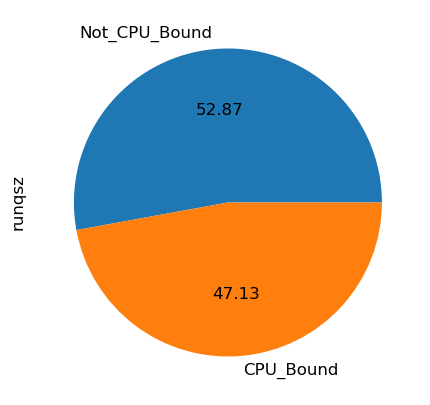

In [36]:
comp['runqsz'].value_counts().plot(kind = 'pie', autopct = '%.2f')

##### Calculation of mean value of 'usr' - (Portion of time (%) that cpus run in user mode) according to 'CPU_Bound' and 'Not_CPU_Bound'.

In [37]:
comp.groupby('runqsz').aggregate({'usr':'mean'})

,usr
runqsz,
CPU_Bound,78.863248
Not_CPU_Bound,88.520434


<Figure size 1000x1000 with 0 Axes>

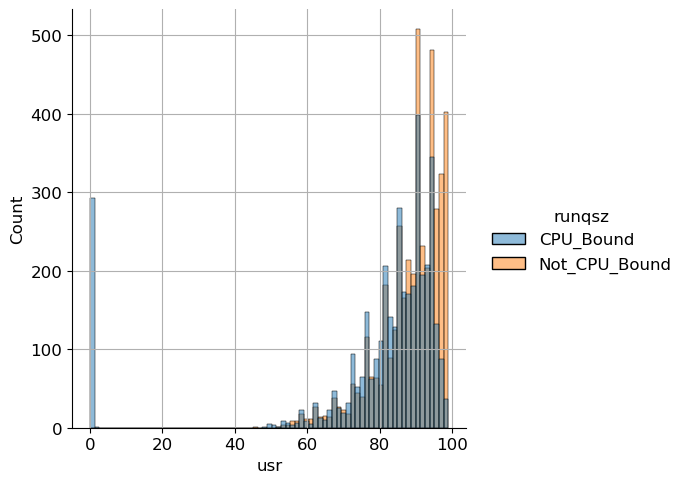

In [38]:
plt.figure(figsize=(10,10))
sns.displot(x='usr', hue='runqsz', data=comp)

<AxesSubplot:xlabel='usr', ylabel='runqsz'>

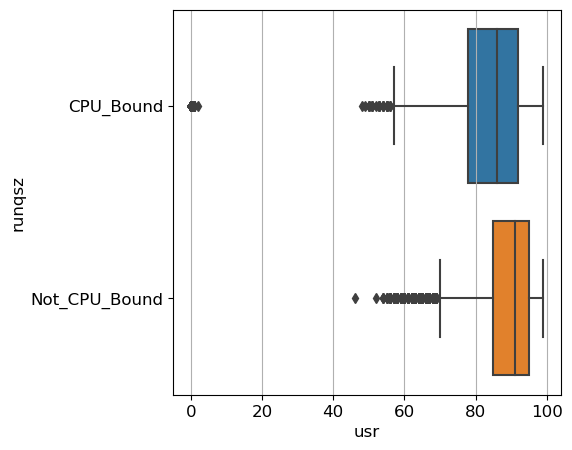

In [39]:
sns.boxplot(x = comp['usr'], y=comp['runqsz'])

#### From the above plots we get following insights: -

##### (i) Even though the number of records in count is more in case of Not_CPU_Bound we can observe balance between these two with the evidence of pie chart.
##### (ii) The mean value of 'usr' in case of 'Not_CPU_Bound' is higher than that of mean value of 'usr' in case of 'CPU_Bound'. It means the Portion of time (%) that cpus run in user mode is higher in case of "Not_CPU_Bound" than that of "CPU_Bound". 
#### ---> This may be because we can see some values of 'usr' in case 'CPU_Bound' are nearby/equal to 0 which we can observe with the help of the above distribution plot and box plot.

In [40]:
comp[comp['usr'] == 0]

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
7,21,18,2799,291,211,0.60,0.40,NaN,259868.0,2.60,4.80,4.80,0.0,0.00,1.00,1.00,35.40,71.00,CPU_Bound,87,13,0
32,6,1,2414,249,163,1.20,3.60,NaN,472149.0,2.00,2.60,2.60,0.8,0.80,11.00,15.80,61.00,133.40,CPU_Bound,89,10,0
51,50,65,2292,357,201,0.40,1.80,NaN,75166.0,5.80,9.20,16.20,15.4,1.40,5.40,8.00,33.80,87.00,CPU_Bound,88,12,0
56,13,12,2527,254,144,0.20,0.20,NaN,485338.0,0.00,0.00,0.00,0.0,107.58,25.95,26.15,37.72,238.12,CPU_Bound,81,19,0
63,7,2,2404,211,153,1.40,2.61,NaN,43705.0,0.40,0.40,0.40,0.0,0.00,5.01,7.41,76.95,129.86,CPU_Bound,89,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8017,3,1,1833,659,317,0.20,0.20,735962.0,516358.0,7.60,14.20,20.80,30.4,3.00,11.00,16.00,27.60,62.20,CPU_Bound,89,11,0
8084,73,83,4405,540,461,8.42,2.40,272948.0,43129.0,6.41,8.82,8.62,0.0,1.40,6.21,11.22,405.81,612.22,CPU_Bound,68,32,0
8086,60,78,862,387,131,0.20,0.20,626392.0,639838.0,1.20,1.40,1.40,0.0,0.00,0.00,0.00,15.60,34.40,CPU_Bound,94,6,0
8148,19,16,1806,406,226,0.60,0.40,641052.0,533824.0,0.00,0.00,0.00,0.0,0.00,22.00,32.00,37.40,79.00,CPU_Bound,91,9,0


In [41]:
# comp.groupby('runqsz').describe().T
comp.groupby('runqsz').aggregate({'usr' : 'describe'}).T

runqsz       CPU_Bound  Not_CPU_Bound
usr count  3861.000000    4331.000000
    mean     78.863248      88.520434
    std      24.181073       8.681069
    min       0.000000      46.000000
    25%      78.000000      85.000000
    50%      86.000000      91.000000
    75%      92.000000      95.000000
    max      99.000000      99.000000

##### When we observe above both tables combinely we can get insight that there are 283 records where the value of 'usr' is equal to 0 and all 283 records are belonging to 'CPU_Bound'.

#### Bivariate Data Analysis

<AxesSubplot:xlabel='lread', ylabel='usr'>

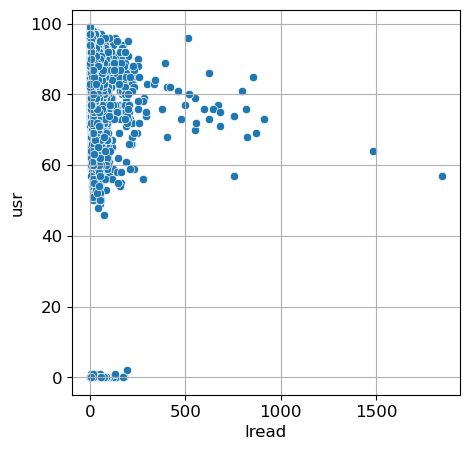

In [42]:
sns.scatterplot(x='lread', y='usr', data=comp)

<AxesSubplot:xlabel='lwrite', ylabel='usr'>

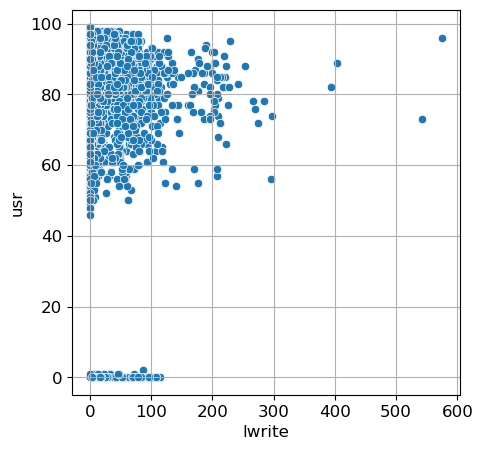

In [43]:
sns.scatterplot(x='lwrite', y='usr', data=comp)

<AxesSubplot:xlabel='scall', ylabel='usr'>

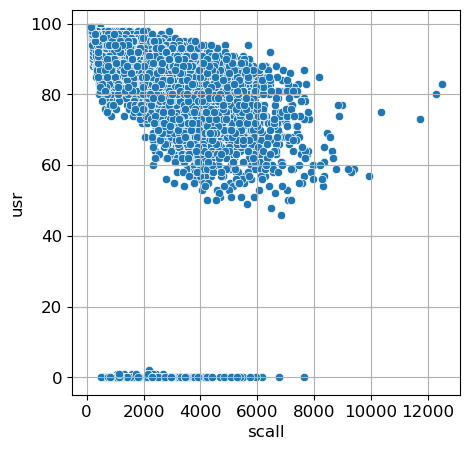

In [44]:
sns.scatterplot(x='scall', y='usr', data=comp)

<AxesSubplot:xlabel='sread', ylabel='usr'>

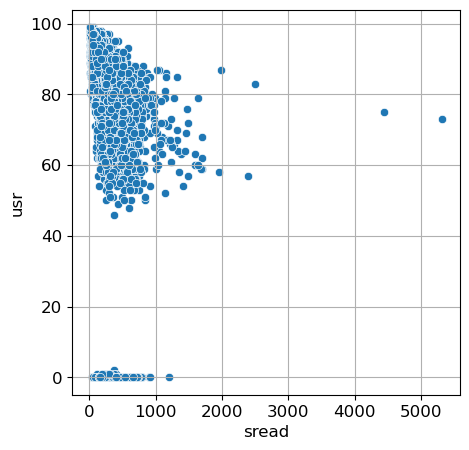

In [45]:
sns.scatterplot(x='sread', y='usr', data=comp)

<AxesSubplot:xlabel='swrite', ylabel='usr'>

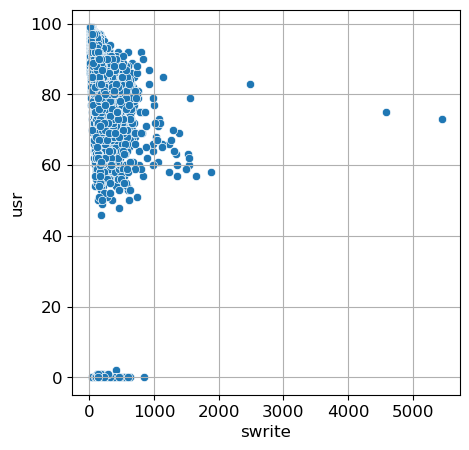

In [46]:
sns.scatterplot(x='swrite', y='usr', data=comp)

<AxesSubplot:xlabel='fork', ylabel='usr'>

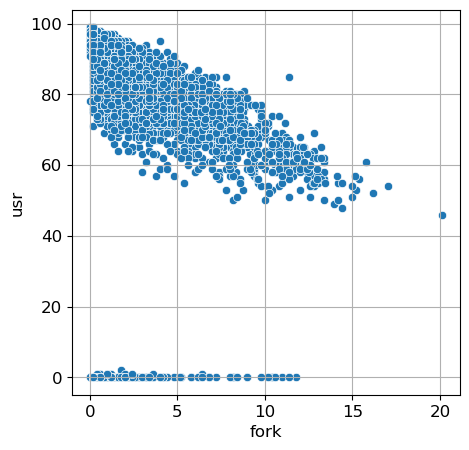

In [47]:
sns.scatterplot(x='fork', y = 'usr', data=comp)

In [48]:
# from scipy.stats import zscore

In [49]:
# s_comp = comp.drop('runqsz', axis=1).apply(zscore)

#### Multivariate Analysis

In [ ]:
sns.pairplot(data=comp, diag_kind='kde', hue='runqsz')

<AxesSubplot:>

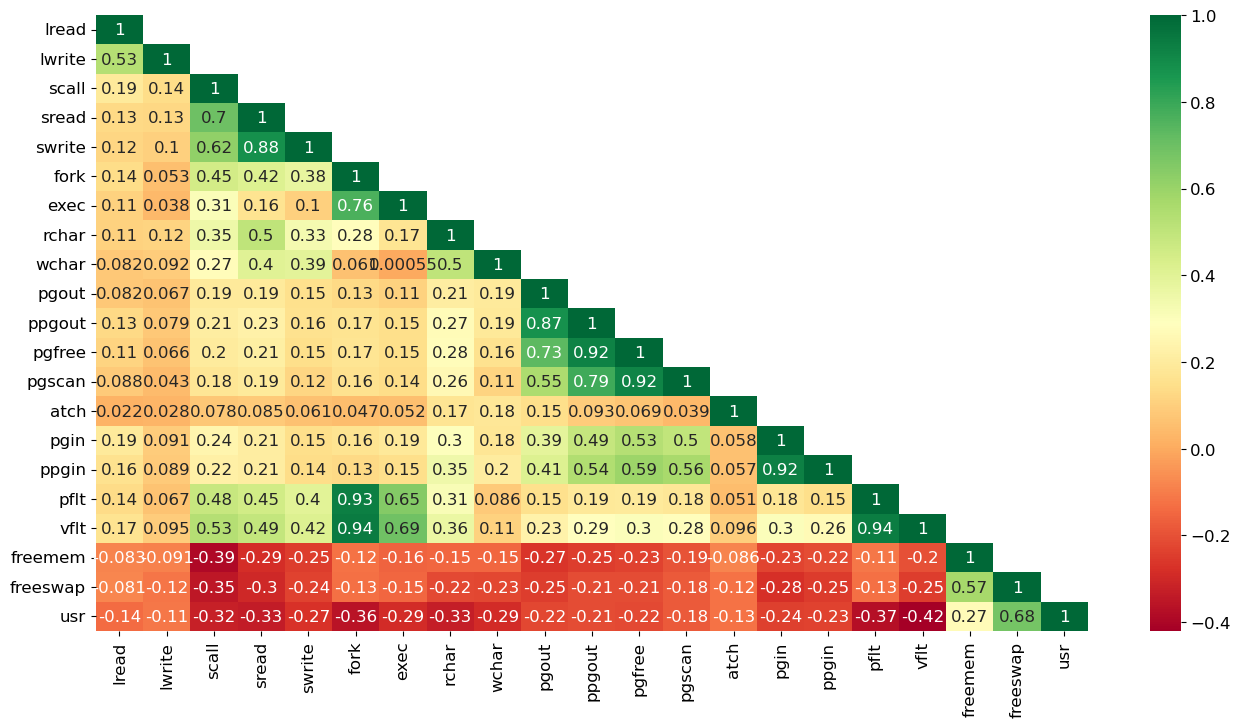

In [50]:
plt.figure(figsize=(16,8))
sns.heatmap(comp.corr(), annot = True, mask = np.triu(comp.corr(), 1), cmap = 'RdYlGn')

In [51]:
comp.corrwith(comp.usr)

lread      -0.141394
lwrite     -0.111213
scall      -0.323188
sread      -0.332160
swrite     -0.272252
fork       -0.363277
exec       -0.288526
rchar      -0.329737
wchar      -0.288974
pgout      -0.221877
ppgout     -0.212295
pgfree     -0.216278
pgscan     -0.181488
atch       -0.125074
pgin       -0.241720
ppgin      -0.233682
pflt       -0.372495
vflt       -0.420685
freemem     0.270308
freeswap    0.678526
usr         1.000000
dtype: float64

###### From the above Scatter plots,Pair plots and Heat map, when target variable('usr') compared with other variables, we can get insights as:
##### (a) The relationship between 'usr' and other attributes is not really linear.
##### (b) Several assumptions of classical linear regression to be voilated.
##### (c) There is linear relationship between independent variables.
##### (d) There is very high multicolinearity between the independent variables.
##### (e) The target variable 'usr' is showing strong correlation with dependent variable i.e., 'freeswap'
##### (f) We can observe lots of variables have negetive correlation with the target varibale. This is because time and speed have inverse correlation between them.

In [52]:
# data = comp.drop(['runqsz'], axis=1)

In [53]:
# data.dropna(axis=0, inplace=True)

In [54]:
# from scipy.stats import zscore
# df =data.apply(zscore)
# df.head()

In [55]:
# df.isnull().sum()[df.isnull().sum() > 0]

In [56]:
# comp = pd.get_dummies(comp, columns = ['runqsz']).drop('runqsz_Not_CPU_Bound', axis=1)
# comp.head()

In [57]:
# df1 = data.drop(['usr'], axis=1)

In [58]:
comp[comp['pgscan'] > 0]

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
14,3,0,1131,74,44,1.20,1.80,NaN,8905.0,0.80,0.80,12.80,32.20,0.00,4.20,7.40,108.60,142.40,CPU_Bound,133,1703250,94
18,56,11,3910,259,163,10.78,37.13,NaN,37938.0,6.99,21.96,46.51,56.29,3.59,39.32,46.51,505.59,767.07,Not_CPU_Bound,159,1088988,59
24,5,1,1490,172,82,2.20,2.20,NaN,19436.0,5.19,9.58,18.36,35.73,10.18,11.38,11.58,143.11,247.11,Not_CPU_Bound,162,977095,89
30,17,0,3902,411,355,15.40,35.40,NaN,228809.0,5.40,15.60,23.60,28.60,0.00,11.80,13.00,544.20,1040.60,Not_CPU_Bound,373,1079026,56
32,6,1,2414,249,163,1.20,3.60,NaN,472149.0,2.00,2.60,2.60,0.80,0.80,11.00,15.80,61.00,133.40,CPU_Bound,89,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8184,8,2,4784,416,240,1.20,1.60,442876.0,110453.0,7.82,24.85,79.16,129.06,0.40,35.27,48.70,106.81,329.86,CPU_Bound,205,1011407,77
8185,13,0,4279,235,176,12.22,34.47,289309.0,30701.0,0.40,0.40,2.20,7.01,8.82,4.21,4.21,397.60,751.30,Not_CPU_Bound,184,1079269,61
8187,16,12,3009,360,244,1.60,5.81,405250.0,85282.0,8.02,20.64,43.69,55.11,0.60,35.87,47.90,139.28,270.74,CPU_Bound,387,986647,80
8188,4,0,1596,170,146,2.40,1.80,89489.0,41764.0,3.80,4.80,4.80,0.20,0.80,3.80,4.40,122.40,212.60,Not_CPU_Bound,263,1055742,90


In [59]:
# sns.pairplot(data=comp, diag_kind = 'kde', hue = 'runqsz')

---

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

In [60]:
comp.isna().sum()[comp.isnull().sum() > 0]

rchar    104
wchar     15
dtype: int64

In [61]:
comp[comp.isnull().any(axis=1)]

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,0.0,0.0,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,0.0,0.0,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90
5,0,0,1201,65,61,0.4,0.4,NaN,58703.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.40,34.40,Not_CPU_Bound,6854,1877461,96
6,1,0,5744,168,190,0.2,0.2,NaN,189975.0,6.0,8.8,8.0,0.0,4.4,0.6,0.6,27.40,28.60,Not_CPU_Bound,312,1013458,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,0,3294,271,172,1.0,2.6,569257.0,NaN,4.0,5.6,5.6,0.0,2.4,17.6,20.0,90.80,222.60,Not_CPU_Bound,369,1017470,85
107,1,1,214,17,30,0.2,0.2,7359.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.63,17.84,Not_CPU_Bound,7309,1869372,97
108,6,0,3816,367,232,4.2,3.4,680520.0,NaN,0.0,0.0,0.0,0.0,0.0,22.6,24.2,177.00,317.80,CPU_Bound,1305,1043736,81
109,0,0,168,12,14,0.2,0.2,1081.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.00,16.80,Not_CPU_Bound,8307,1863622,97


#### From the above table we can see that there are total 109 records combinely which have null values.
##### To impute these rows need to do one hot encoding for categorical values as follows.

In [62]:
comp_dummy = pd.get_dummies(comp, drop_first=True)
comp.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,0.0,0.0,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,0.0,0.0,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,0.0,0.0,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


##### By applying lambda function we can impute the null values with median. 

In [63]:
comp_dummy = comp_dummy.apply(lambda x: x.fillna(x.median()),axis=0)

In [64]:
comp_dummy.isnull().sum()[comp_dummy.isnull().sum() > 0]

Series([], dtype: int64)

In [65]:
comp_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lread                 8192 non-null   int64  
 1   lwrite                8192 non-null   int64  
 2   scall                 8192 non-null   int64  
 3   sread                 8192 non-null   int64  
 4   swrite                8192 non-null   int64  
 5   fork                  8192 non-null   float64
 6   exec                  8192 non-null   float64
 7   rchar                 8192 non-null   float64
 8   wchar                 8192 non-null   float64
 9   pgout                 8192 non-null   float64
 10  ppgout                8192 non-null   float64
 11  pgfree                8192 non-null   float64
 12  pgscan                8192 non-null   float64
 13  atch                  8192 non-null   float64
 14  pgin                  8192 non-null   float64
 15  ppgin                

In [66]:
comp.duplicated().sum()

0

##### There is no duplicate values in the dataset.

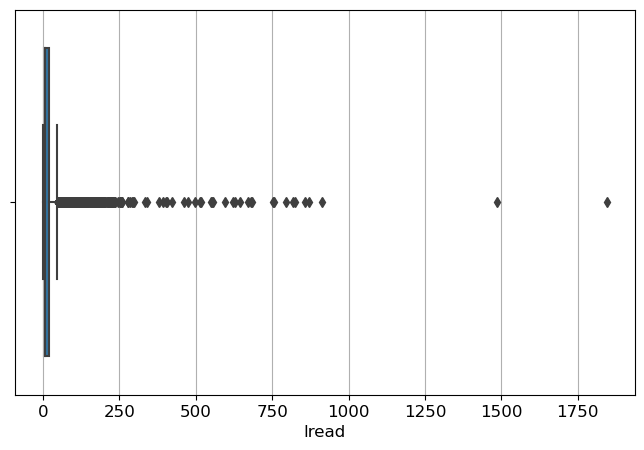

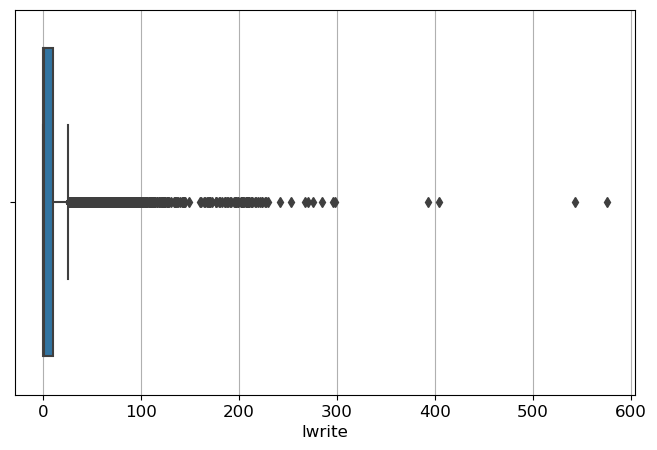

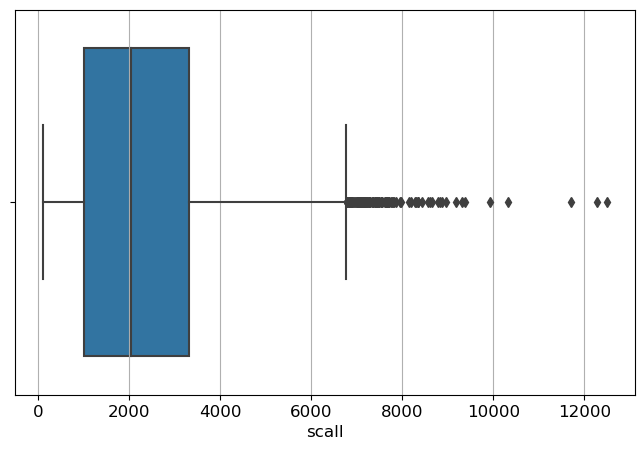

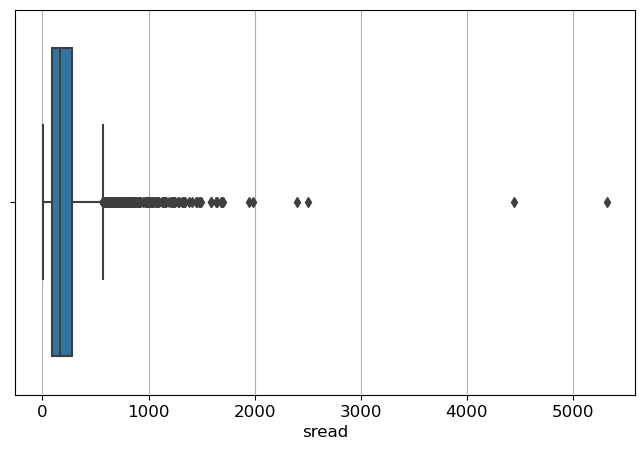

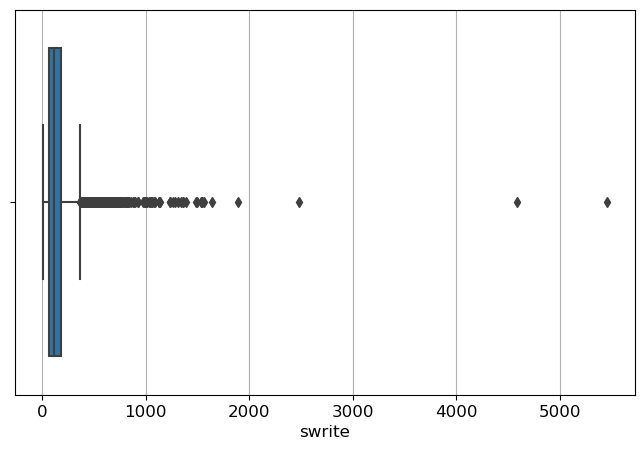

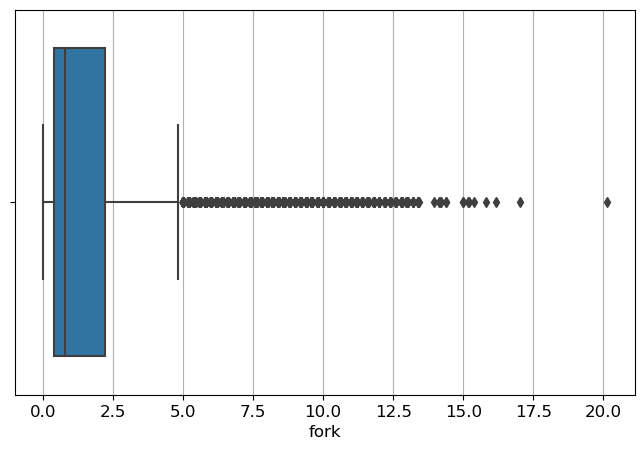

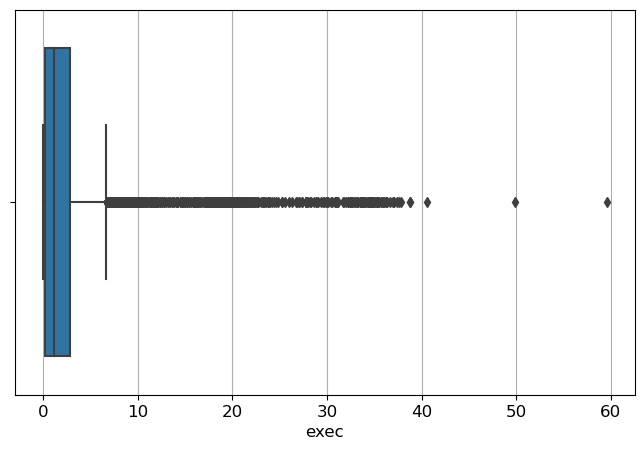

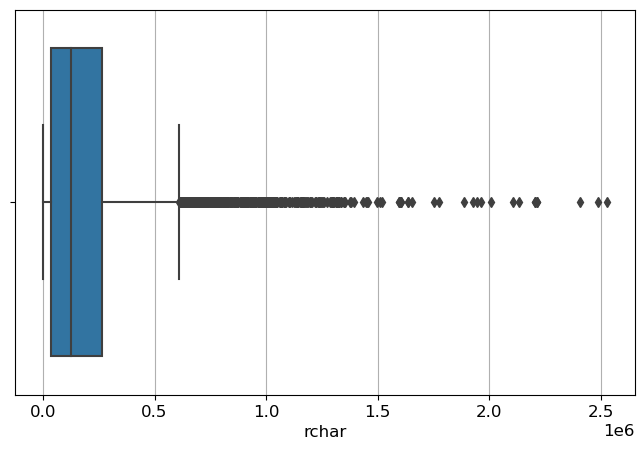

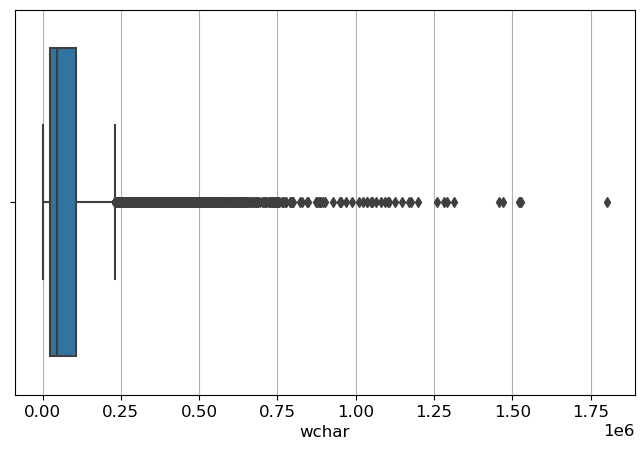

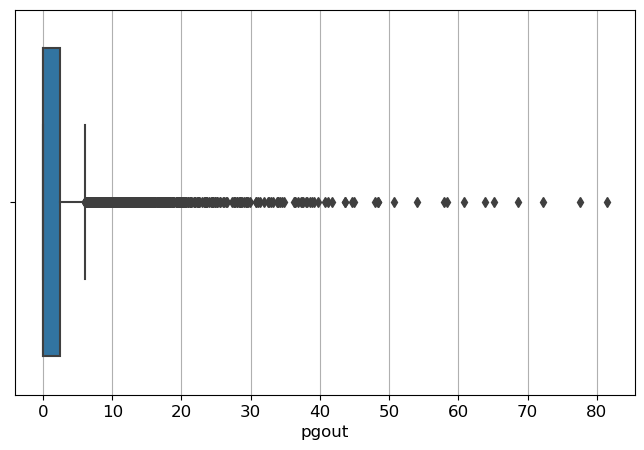

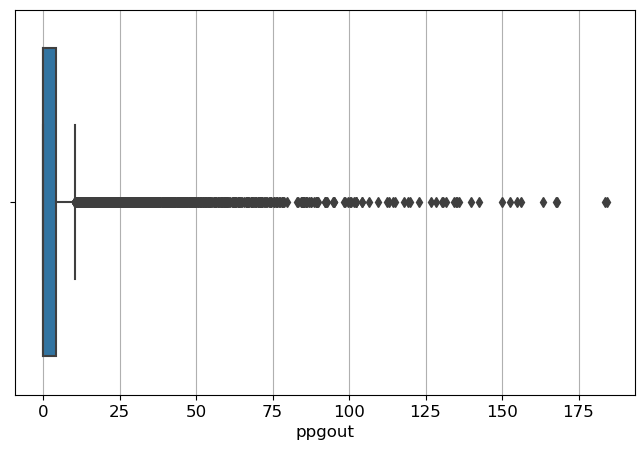

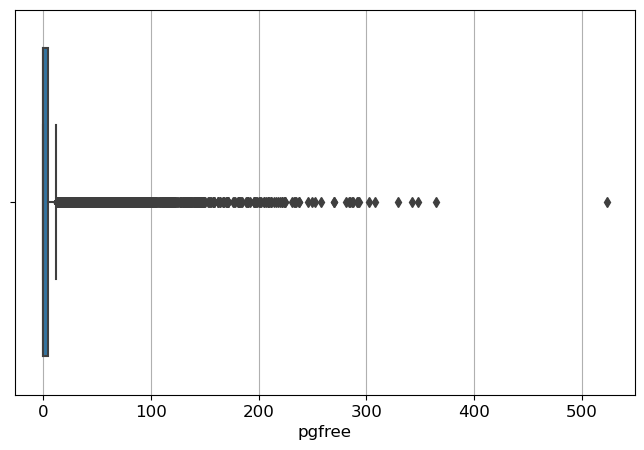

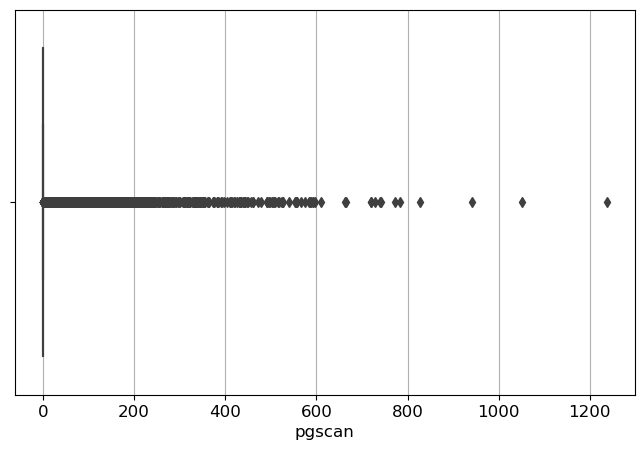

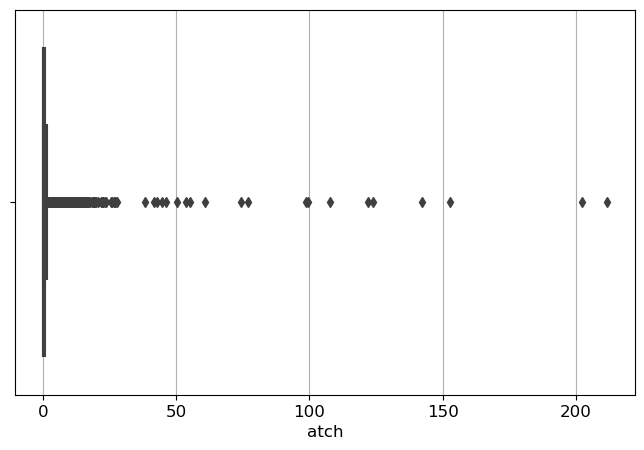

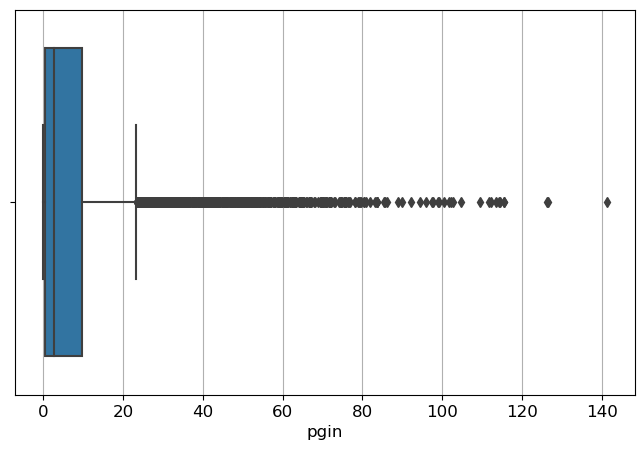

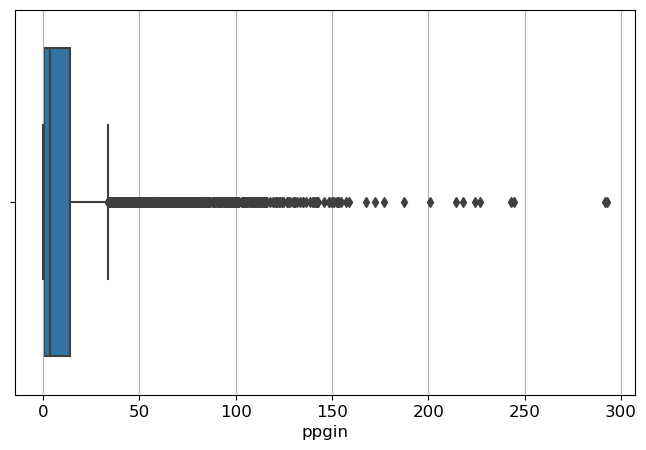

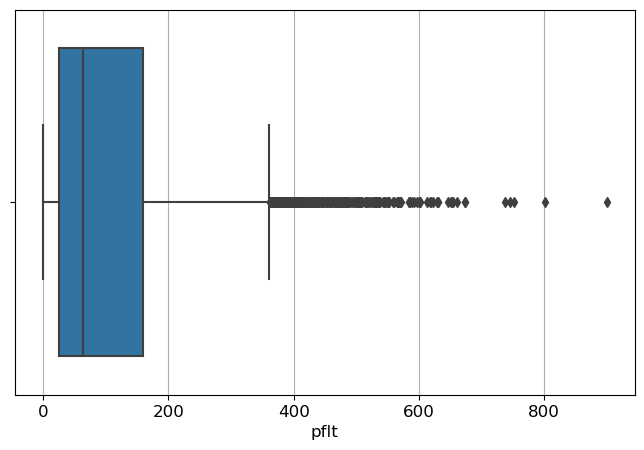

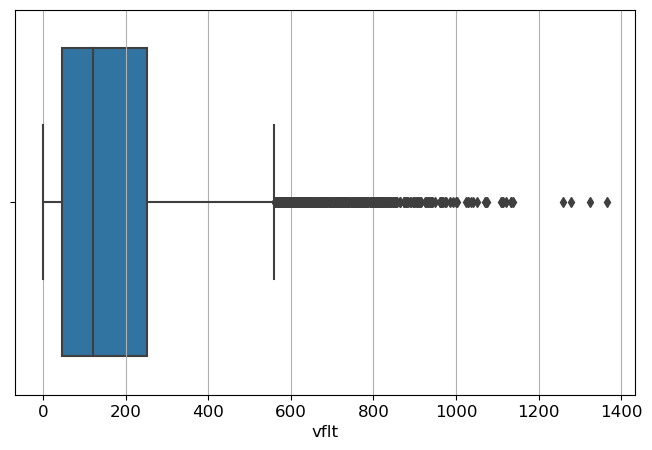

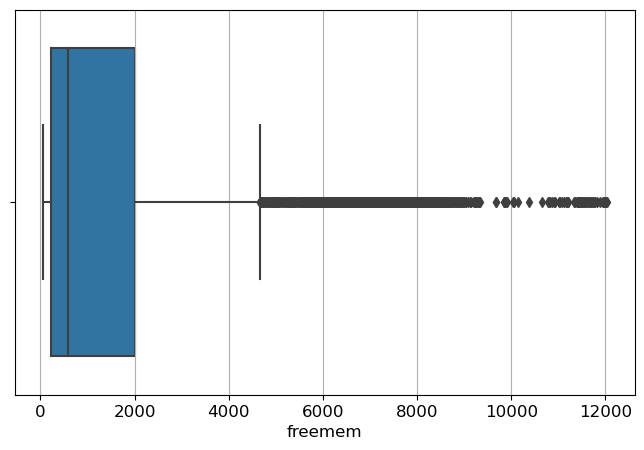

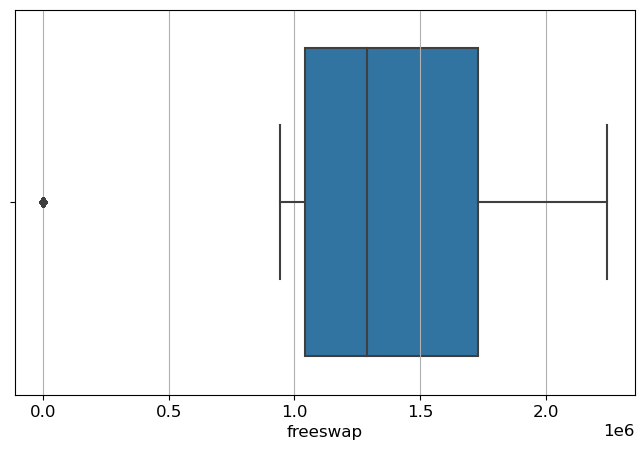

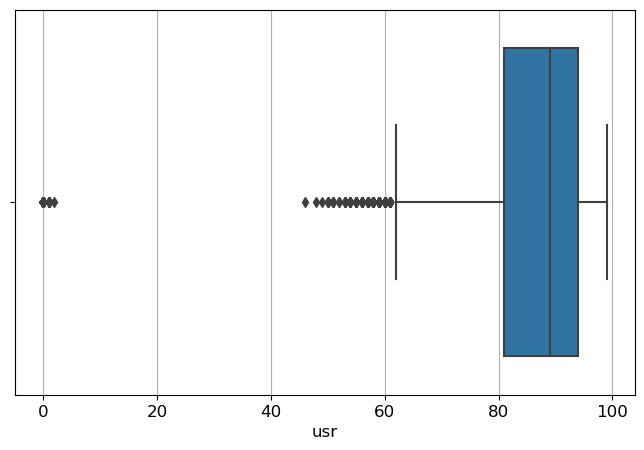

In [67]:
data = comp_dummy.drop(['runqsz_Not_CPU_Bound'], axis=1)
for i in data.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x = data[i])
    plt.show()

##### With the above box plots we can get insights as there are huge number of outliers present in almost all features of the dataset.
#### If keen observation made on box plot of target variable 'usr' we can see that there are some extreme outliers on lower whisker, where the value of 'usr' are near by/equal to 0 which is drawn in the below table.

In [68]:
comp_dummy[comp_dummy['usr'] < 3]

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
7,21,18,2799,291,211,0.6,0.40,125473.5,259868.0,2.6,4.8,4.8,0.0,0.00,1.00,1.00,35.40,71.00,87,13,0,0
32,6,1,2414,249,163,1.2,3.60,125473.5,472149.0,2.0,2.6,2.6,0.8,0.80,11.00,15.80,61.00,133.40,89,10,0,0
51,50,65,2292,357,201,0.4,1.80,125473.5,75166.0,5.8,9.2,16.2,15.4,1.40,5.40,8.00,33.80,87.00,88,12,0,0
56,13,12,2527,254,144,0.2,0.20,125473.5,485338.0,0.0,0.0,0.0,0.0,107.58,25.95,26.15,37.72,238.12,81,19,0,0
63,7,2,2404,211,153,1.4,2.61,125473.5,43705.0,0.4,0.4,0.4,0.0,0.00,5.01,7.41,76.95,129.86,89,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8086,60,78,862,387,131,0.2,0.20,626392.0,639838.0,1.2,1.4,1.4,0.0,0.00,0.00,0.00,15.60,34.40,94,6,0,0
8110,131,46,1726,300,282,1.0,1.20,297680.0,286051.0,0.0,0.0,0.0,0.0,0.20,8.22,12.42,85.57,143.69,88,12,1,0
8148,19,16,1806,406,226,0.6,0.40,641052.0,533824.0,0.0,0.0,0.0,0.0,0.00,22.00,32.00,37.40,79.00,91,9,0,0
8166,18,1,1135,188,135,2.4,12.40,485245.0,109897.0,3.0,3.8,3.8,0.0,1.80,14.80,19.20,60.60,139.00,88,10,1,0


#### According to Degree of Mutiprogramming, the portion of time (%) that cpu run in CPU_Bond cannot be 0. It means if it CPU idle because of the absense of one process it will keep another process ready for better utilization on CPU which is the memory management technique.
#### Operating system will also got mounted in some portion of the memory.
#### Degree of Multiprogramming means more and more number of processes in the Primary Memory in Non contiguous allocation.
#### The above records showing the value for usr as 0 & nearby 0 in case of CPU_Bound. Hence, it is recommended to drop these records for building the effective model.

In [69]:
dataindex = comp_dummy[comp_dummy.usr < 3].index
comp_dummy.drop(dataindex, inplace=True)
# comp_data = comp_dummy.drop(dataindex)

<AxesSubplot:xlabel='usr'>

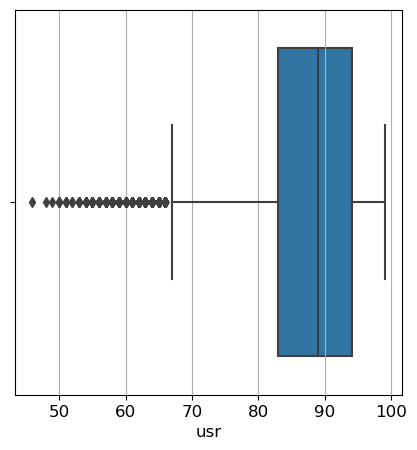

In [70]:
sns.boxplot(x=comp_dummy.usr)

In [71]:
dataindex = comp[comp.usr < 3].index
df = comp.drop(dataindex)
df.groupby('runqsz').aggregate({'usr':'describe'}).T

runqsz       CPU_Bound  Not_CPU_Bound
usr count  3567.000000    4331.000000
    mean     85.359966      88.520434
    std       8.858801       8.681069
    min      48.000000      46.000000
    25%      81.000000      85.000000
    50%      87.000000      91.000000
    75%      92.000000      95.000000
    max      99.000000      99.000000

##### There is a significant increase in the mean value of 'usr' in case of CPU_Bound after drop the 0/nearby 0 valued records (Extreme outliers)

---

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

#### Categorical column runqsz is encoded with the One hot encoding and the column runsqz_CPU_Bound was dropped because the information of this feature can be obtained from the other runsqz_Not_CPU_Bound.

#### Since target variable 'usr' is having 0 values or close to 0 values in as lower whisker outliers which will affect the performance of the regression model. The curve will little tilde with towards outliers. Since outliers are less than 5% of the records of the dataset, Hence we can proceed to drop the outliers. Outlier records in 'usr' feature is drop and created new dataset in a varible comp_dummy in the above method. 

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Model before drop extreme outliers in feature 'usr' (usr < 3)

In [73]:
comp_data = pd.get_dummies(comp, drop_first=True)
comp_data.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,0.0,0.0,0.0,0.0,1.6,2.6,16.00,26.40,4670,1730946,95,0
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.63,16.83,7278,1869002,97,1
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,0.0,0.0,0.0,1.2,6.0,9.4,150.20,220.20,702,1021237,87,1
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,15.60,16.80,7248,1863704,98,1
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,0.0,0.0,0.0,0.0,1.0,1.2,37.80,47.60,633,1760253,90,1


In [74]:
comp_data[comp_data['usr'] == 0]

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
7,21,18,2799,291,211,0.60,0.40,NaN,259868.0,2.60,4.80,4.80,0.0,0.00,1.00,1.00,35.40,71.00,87,13,0,0
32,6,1,2414,249,163,1.20,3.60,NaN,472149.0,2.00,2.60,2.60,0.8,0.80,11.00,15.80,61.00,133.40,89,10,0,0
51,50,65,2292,357,201,0.40,1.80,NaN,75166.0,5.80,9.20,16.20,15.4,1.40,5.40,8.00,33.80,87.00,88,12,0,0
56,13,12,2527,254,144,0.20,0.20,NaN,485338.0,0.00,0.00,0.00,0.0,107.58,25.95,26.15,37.72,238.12,81,19,0,0
63,7,2,2404,211,153,1.40,2.61,NaN,43705.0,0.40,0.40,0.40,0.0,0.00,5.01,7.41,76.95,129.86,89,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8017,3,1,1833,659,317,0.20,0.20,735962.0,516358.0,7.60,14.20,20.80,30.4,3.00,11.00,16.00,27.60,62.20,89,11,0,0
8084,73,83,4405,540,461,8.42,2.40,272948.0,43129.0,6.41,8.82,8.62,0.0,1.40,6.21,11.22,405.81,612.22,68,32,0,0
8086,60,78,862,387,131,0.20,0.20,626392.0,639838.0,1.20,1.40,1.40,0.0,0.00,0.00,0.00,15.60,34.40,94,6,0,0
8148,19,16,1806,406,226,0.60,0.40,641052.0,533824.0,0.00,0.00,0.00,0.0,0.00,22.00,32.00,37.40,79.00,91,9,0,0


In [75]:
comp_data = comp_data.apply(lambda x: x.fillna(x.median()),axis=0) # for imputing null values

In [76]:
X = comp_data.drop('usr', axis=1)
Y = comp_data[['usr']]

In [77]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 1)

In [78]:
reg_mod_all = LinearRegression()
reg_mod_all.fit(X_train,Y_train)

LinearRegression()

In [79]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, np.round(reg_mod_all.coef_[0][idx],5)))

The coefficient for lread is -0.01989
The coefficient for lwrite is 0.00479
The coefficient for scall is 0.00101
The coefficient for sread is -0.00047
The coefficient for swrite is -0.00204
The coefficient for fork is -1.72225
The coefficient for exec is -0.08963
The coefficient for rchar is -0.0
The coefficient for wchar is -1e-05
The coefficient for pgout is -0.1739
The coefficient for ppgout is 0.09894
The coefficient for pgfree is -0.07034
The coefficient for pgscan is 0.00862
The coefficient for atch is -0.07856
The coefficient for pgin is 0.09127
The coefficient for ppgin is -0.05938
The coefficient for pflt is -0.04151
The coefficient for vflt is 0.02228
The coefficient for freemem is -0.00162
The coefficient for freeswap is 3e-05
The coefficient for runqsz_Not_CPU_Bound is 7.79079


#### The values of coeffiecient value for Not_CPU_Bound is significantly high in the list.
##### The coefficient value for feature fork is second highest and is negetive.

In [80]:
intercept = reg_mod_all.intercept_[0]

print("Intercept of model is {}".format(intercept))

Intercept of model is 44.63798453682635


In [81]:
reg_mod_all.score(X_train,Y_train)

0.6428396267060905

In [82]:
reg_mod_all.score(X_test,Y_test)

0.631217100611974

In [83]:
import statsmodels.formula.api as sm

In [84]:
fa = 'usr ~ lread+lwrite+scall+sread+swrite+fork+exec+rchar+wchar+pgout+ppgout+pgfree+pgscan+atch+pgin+ppgin+pflt+vflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [85]:
mod_a = sm.ols(fa, data=comp_data).fit()
mod_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     692.0
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:06:38   Log-Likelihood:                -31296.
No. Observations:                8192   AIC:                         6.264e+04
Df Residuals:                    8170   BIC:                         6.279e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               42.8406      0.623     68.749      0.000      41.619      44.062
lread                   -0.0198      0.003     -7.088      0.000      -0.025      -0.014
lwrite                   0.0074      0.005      1.522      0.128      -0.002       0.017
scall                    0.0010      0.000      8.759      0.000       0.001       0.001
sread                -9.749e-05      0.002     -0.061      0.952      -0.003       0.003
swrite                  -0.0016      0.002     -0.889      0.374      -0.005       0.002
fork                    -1.8871      0.209     -9.039      0.000      -2.296      -1.478
exec                    -0.0416      0.041     -1.013      0.311      -0.122       0.039
rchar                -3.657e-06   7.19e-07     -5.084      0.000   -5.07e-06   -2.25e-06
wchar                -1.066e-05    1.1e-06     -9.731      0.000   -1.28e-05   -8.51e-06
pgout                   -0.2048      0.054     -3.799      0.000      -0.310      -0.099
ppgout                   0.1270      0.031      4.109      0.000       0.066       0.188
pgfree                  -0.0880      0.016     -5.553      0.000      -0.119      -0.057
pgscan                   0.0125      0.005      2.644      0.008       0.003       0.022
atch                    -0.0396      0.022     -1.773      0.076      -0.083       0.004
pgin                     0.0581      0.024      2.383      0.017       0.010       0.106
ppgin                   -0.0392      0.016     -2.507      0.012      -0.070      -0.009
pflt                    -0.0401      0.004    -11.182      0.000      -0.047      -0.033
vflt                     0.0228      0.003      8.215      0.000       0.017       0.028
freemem                 -0.0017   6.37e-05    -26.141      0.000      -0.002      -0.002
freeswap              3.325e-05   3.82e-07     87.082      0.000    3.25e-05     3.4e-05
runqsz_Not_CPU_Bound     7.9475      0.258     30.828      0.000       7.442       8.453
==============================================================================
Omnibus:                     1928.707   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5359.778
Skew:                          -1.244   Prob(JB):                         0.00
Kurtosis:                       6.084   Cond. No.                     7.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
model_name = []
model_perf = []

model_name.append('Model_all')
model_perf.append(mod_a.rsquared_adj)

In [87]:
model_perf

[0.6392074231487797]

#### We notice that the ${R^2}$ value in this case is very low. 
- Only around 64% variability in the dependent variable is being explained by the independent variables.

In [88]:
mod_a.resid

0        1.459265
1       -3.237700
2        7.417942
3       -1.653668
4      -16.665084
          ...    
8187     9.602673
8188     9.237584
8189     2.560993
8190     4.265646
8191    -1.953613
Length: 8192, dtype: float64

In [89]:
mse_a = np.square(mod_a.resid).mean()

In [90]:
rmse_a = np.sqrt(mse_a)
rmse_a

11.038438081148826

##### Model with all records have the performace score in train it is 0.6428 and in case of test it is 0.6312
##### $R^2$ value is 0.640 and Adj-$R^2$  value is 0.639
##### RMSE value is 11.0384

##### To improve the performance of the model we can punish the outlier and build a model as follows
##### Outliers are less than 5% of the records, hence extreme outliers in lower whisker of feature 'usr' are drop.

#### Model after drop 'usr' = 0 & 'usr' < 3 records

In [91]:
comp_dummy[comp_dummy['usr'] < 3]

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound


In [92]:
x = comp_dummy.drop('usr', axis=1)
# x = x.drop({'runqsz_Not_CPU_Bound'}, axis=1)
y = comp_dummy[['usr']]

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = 1)

In [94]:
reg_mod_1 = LinearRegression()
reg_mod_1.fit(x_train,y_train)

LinearRegression()

In [95]:
# for idx, col_name in enumerate(x_train.columns):
#     print("The coefficient for {} is {}".format(col_name, reg_mod_1.coef_[0][idx]))

In [96]:
intercept = reg_mod_1.intercept_[0]

print("Intercept of model is {}".format(intercept))

Intercept of model is 99.20957367097307


In [97]:
reg_mod_1.score(x_train,y_train)

0.9147301046581657

In [98]:
reg_mod_1.score(x_test, y_test)

0.9141342787215146

##### The performace score of the model with all features in train after eleminating records 'usr' < 3, it is 91.47% and test is 91.41%.
##### However the performance of the model is improved.
##### Before proceed further it is necessary check the $R^2$, Adj $R^2$ & RMSE values.

#### For computing the Rsquare value, Adjusted Rsquare & RMSE we can proceed for Statsmodels.

In [99]:
import statsmodels.formula.api as sm

In [100]:
comp.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [101]:
f1 = 'usr ~ lread+lwrite+scall+sread+swrite+fork+exec+rchar+wchar+pgout+ppgout+pgfree+pgscan+atch+pgin+ppgin+pflt+vflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [102]:
mod_1 = sm.ols(f1, data=comp_dummy).fit()
mod_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     4020.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:06:39   Log-Likelihood:                -18754.
No. Observations:                7898   AIC:                         3.755e+04
Df Residuals:                    7876   BIC:                         3.770e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               99.3748      0.212    469.058      0.000      98.959      99.790
lread                   -0.0103      0.001    -15.574      0.000      -0.012      -0.009
lwrite                  -0.0015      0.001     -1.295      0.195      -0.004       0.001
scall                   -0.0015   2.89e-05    -51.316      0.000      -0.002      -0.001
sread                    0.0005      0.000      1.343      0.179      -0.000       0.001
swrite                  -0.0034      0.000     -7.892      0.000      -0.004      -0.003
fork                     0.0544      0.051      1.074      0.283      -0.045       0.154
exec                    -0.2681      0.010    -27.115      0.000      -0.287      -0.249
rchar                -1.774e-06   1.73e-07    -10.237      0.000   -2.11e-06   -1.43e-06
wchar                -4.884e-06   2.81e-07    -17.361      0.000   -5.44e-06   -4.33e-06
pgout                   -0.1189      0.013     -9.060      0.000      -0.145      -0.093
ppgout                   0.0221      0.008      2.897      0.004       0.007       0.037
pgfree                  -0.0138      0.004     -3.508      0.000      -0.021      -0.006
pgscan                   0.0028      0.001      2.507      0.012       0.001       0.005
atch                     0.0048      0.006      0.782      0.434      -0.007       0.017
pgin                    -0.0210      0.006     -3.606      0.000      -0.032      -0.010
ppgin                   -0.0376      0.004    -10.020      0.000      -0.045      -0.030
pflt                    -0.0178      0.001    -20.533      0.000      -0.019      -0.016
vflt                    -0.0149      0.001    -21.892      0.000      -0.016      -0.014
freemem                  0.0002   1.58e-05     12.135      0.000       0.000       0.000
freeswap             -1.042e-06   1.29e-07     -8.072      0.000    -1.3e-06   -7.89e-07
runqsz_Not_CPU_Bound    -0.2927      0.065     -4.522      0.000      -0.420      -0.166
==============================================================================
Omnibus:                      962.791   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2844.762
Skew:                          -0.650   Prob(JB):                         0.00
Kurtosis:                       5.637   Cond. No.                     1.05e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
np.round(1.05e+07, 4)

10500000.0

#### The condition number is too large, hence proceed to build the model on scaled data by considering all features

In [104]:
from scipy.stats import zscore

In [105]:
scale_data = comp_dummy.apply(zscore)

In [106]:
f_1 = 'usr ~ lread+lwrite+scall+sread+swrite+fork+exec+rchar+wchar+pgout+ppgout+pgfree+pgscan+atch+pgin+ppgin+pflt+vflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [107]:
model_s1 = sm.ols(f_1, data=scale_data).fit()
model_s1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     4020.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:06:40   Log-Likelihood:                -1487.7
No. Observations:                7898   AIC:                             3019.
Df Residuals:                    7876   BIC:                             3173.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             7.605e-16      0.003   2.31e-13      1.000      -0.006       0.006
lread                   -0.0625      0.004    -15.574      0.000      -0.070      -0.055
lwrite                  -0.0051      0.004     -1.295      0.195      -0.013       0.003
scall                   -0.2748      0.005    -51.316      0.000      -0.285      -0.264
sread                    0.0117      0.009      1.343      0.179      -0.005       0.029
swrite                  -0.0611      0.008     -7.892      0.000      -0.076      -0.046
fork                     0.0152      0.014      1.074      0.283      -0.013       0.043
exec                    -0.1586      0.006    -27.115      0.000      -0.170      -0.147
rchar                   -0.0460      0.004    -10.237      0.000      -0.055      -0.037
wchar                   -0.0707      0.004    -17.361      0.000      -0.079      -0.063
pgout                   -0.0686      0.008     -9.060      0.000      -0.083      -0.054
ppgout                   0.0372      0.013      2.897      0.004       0.012       0.062
pgfree                  -0.0491      0.014     -3.508      0.000      -0.077      -0.022
pgscan                   0.0224      0.009      2.507      0.012       0.005       0.040
atch                     0.0027      0.003      0.782      0.434      -0.004       0.009
pgin                    -0.0325      0.009     -3.606      0.000      -0.050      -0.015
ppgin                   -0.0929      0.009    -10.020      0.000      -0.111      -0.075
pflt                    -0.2290      0.011    -20.533      0.000      -0.251      -0.207
vflt                    -0.3199      0.015    -21.892      0.000      -0.349      -0.291
freemem                  0.0541      0.004     12.135      0.000       0.045       0.063
freeswap                -0.0400      0.005     -8.072      0.000      -0.050      -0.030
runqsz_Not_CPU_Bound    -0.0164      0.004     -4.522      0.000      -0.023      -0.009
==============================================================================
Omnibus:                      962.791   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2844.762
Skew:                          -0.650   Prob(JB):                         0.00
Kurtosis:                       5.637   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the above summary we can get following insights
##### With the scaled data condition number is 14.7
##### P value for the features atch, fork, lwrite & sread are 0.434,0.283,0.195 & 0.179 respectively. Which are more than a common threshold value 0.05. (The values are very high) needs to drop some features which expressed extreme high P values for betterment of the model. 

In [108]:
model_name.append('Scaled_data_Drop_outliers')
model_perf.append(model_s1.rsquared_adj)

#### Checking of Multicollieniarity with the help of Variance Inflation Factor(VIF values).
##### It is assumed that if the VIF value is more than 5 the variance of that feature can be obtained from some other features in the dataset.

In [109]:
def vif_cal(input_data):
    '''
    input_data : Dataframe features
    '''
    
    x_vars = input_data
    xvar_names = input_data.columns
    
    for i in range(len(xvar_names)):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = sm.ols(formula = 'y~x', data = x_vars).fit().rsquared
        vif = round(1/(1-rsq), 2)
        print(xvar_names[i], 'The VIF Value = ', vif)

In [110]:
vif_cal(input_data = scale_data.drop('usr', axis = 1))

lread The VIF Value =  1.49
lwrite The VIF Value =  1.42
scall The VIF Value =  2.65
sread The VIF Value =  6.97
swrite The VIF Value =  5.54
fork The VIF Value =  18.5
exec The VIF Value =  3.16
rchar The VIF Value =  1.86
wchar The VIF Value =  1.53
pgout The VIF Value =  5.29
ppgout The VIF Value =  15.24
pgfree The VIF Value =  18.09
pgscan The VIF Value =  7.38
atch The VIF Value =  1.09
pgin The VIF Value =  7.48
ppgin The VIF Value =  7.94
pflt The VIF Value =  11.48
vflt The VIF Value =  19.71
freemem The VIF Value =  1.84
freeswap The VIF Value =  2.26
runqsz_Not_CPU_Bound The VIF Value =  1.21


##### From the above it can be concluded that there is a huge multicolinearity among the independent features 
##### The VIF values are very high in features vflt, fork, pgfree, ppgout & pflt.

### Read the model with Train and check its performance on Test

In [111]:
x1 = scale_data.drop('usr', axis=1)
y1 = scale_data[['usr']]

In [112]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1, test_size = 0.30, random_state = 1)

In [113]:
reg_mod_scale = LinearRegression()
reg_mod_scale.fit(x1_train,y1_train)

LinearRegression()

In [114]:
reg_mod_scale.score(x1_train,y1_train)

0.9147301046581657

In [115]:
reg_mod_scale.score(x1_test, y1_test)

0.9141342787215149

#### Insight :- There is no significant change in the train and test score values for scaled and unscaled dataset.

#### Check for Residuals & its pattern

In [116]:
residuals1 = mod_1.resid # errors

In [117]:
predictions1 = mod_1.predict(scale_data)

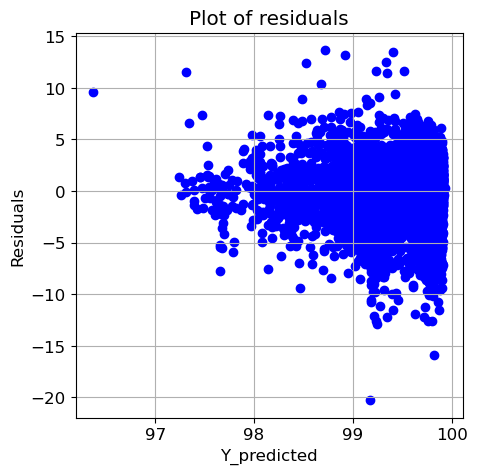

In [118]:
plt.scatter(predictions1, residuals1, c='blue')
plt.title('Plot of residuals')
plt.xlabel('Y_predicted')
plt.ylabel('Residuals')
plt.show()

#### Insights:
##### 1. There is a significant dicrese in the RMSE value as compared to model with outliers in 'usr'.
##### 2. The RMSE value for unscaled data is 2.60012 and on scaled data is 0.29212.
##### 3. We can get an insight that the RMSE value for scaled data is lower as compared to unscaled data
##### 4. From the above plot we cannot find any specific pattern in the residuals.
##### 5. Hence it is better to proceed for build the model with scaled data.

#### Drop feature 'fork' to build model which shows high VIF value and high P value. 

## <font color = darkblue> Dropping features based on high P Value

- We notice that the p-value for the t-statistic calculation for the 'Population' variable is the highest (higher than 0.05).
- For the $\underline{t-statistic}$ for every co-efficient of the Linear Regression the null and alternate Hypothesis is as follows:
- #### ${H_0}$ : The variable is significant.
- #### ${H_1}$:  The variable is not significant.
- Lower the p-value for the t-statistic more significant are the variables.

In [119]:
f2 = 'usr ~ lread+lwrite+scall+sread+swrite+exec+rchar+wchar+pgout+ppgout+pgfree+pgscan+atch+pgin+ppgin+pflt+vflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [120]:
model_s2 = sm.ols(f2, data=scale_data).fit()
model_s2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     4221.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:06:44   Log-Likelihood:                -1488.3
No. Observations:                7898   AIC:                             3019.
Df Residuals:                    7877   BIC:                             3165.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             7.605e-16      0.003   2.31e-13      1.000      -0.006       0.006
lread                   -0.0622      0.004    -15.538      0.000      -0.070      -0.054
lwrite                  -0.0054      0.004     -1.377      0.168      -0.013       0.002
scall                   -0.2755      0.005    -51.844      0.000      -0.286      -0.265
sread                    0.0111      0.009      1.274      0.203      -0.006       0.028
swrite                  -0.0595      0.008     -7.832      0.000      -0.074      -0.045
exec                    -0.1551      0.005    -31.779      0.000      -0.165      -0.146
rchar                   -0.0461      0.004    -10.256      0.000      -0.055      -0.037
wchar                   -0.0708      0.004    -17.408      0.000      -0.079      -0.063
pgout                   -0.0686      0.008     -9.062      0.000      -0.083      -0.054
ppgout                   0.0376      0.013      2.924      0.003       0.012       0.063
pgfree                  -0.0502      0.014     -3.598      0.000      -0.078      -0.023
pgscan                   0.0225      0.009      2.513      0.012       0.005       0.040
atch                     0.0025      0.003      0.719      0.472      -0.004       0.009
pgin                    -0.0337      0.009     -3.769      0.000      -0.051      -0.016
ppgin                   -0.0924      0.009     -9.980      0.000      -0.111      -0.074
pflt                    -0.2249      0.010    -21.426      0.000      -0.246      -0.204
vflt                    -0.3110      0.012    -25.884      0.000      -0.335      -0.287
freemem                  0.0540      0.004     12.104      0.000       0.045       0.063
freeswap                -0.0390      0.005     -8.009      0.000      -0.049      -0.029
runqsz_Not_CPU_Bound    -0.0162      0.004     -4.478      0.000      -0.023      -0.009
==============================================================================
Omnibus:                      972.916   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2854.015
Skew:                          -0.659   Prob(JB):                         0.00
Kurtosis:                       5.633   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
model_name.append('Model_Drop_Fork')
model_perf.append(model_s2.rsquared_adj)

In [122]:
vif_cal(input_data = scale_data.drop(['usr','fork'], axis = 1))

lread The VIF Value =  1.48
lwrite The VIF Value =  1.42
scall The VIF Value =  2.61
sread The VIF Value =  6.94
swrite The VIF Value =  5.33
exec The VIF Value =  2.2
rchar The VIF Value =  1.86
wchar The VIF Value =  1.53
pgout The VIF Value =  5.29
ppgout The VIF Value =  15.23
pgfree The VIF Value =  17.99
pgscan The VIF Value =  7.38
atch The VIF Value =  1.09
pgin The VIF Value =  7.36
ppgin The VIF Value =  7.92
pflt The VIF Value =  10.17
vflt The VIF Value =  13.32
freemem The VIF Value =  1.83
freeswap The VIF Value =  2.19
runqsz_Not_CPU_Bound The VIF Value =  1.21


In [123]:
x2 = scale_data.drop(['usr','fork'], axis=1)
y2 = scale_data[['usr']]

In [124]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2, test_size = 0.30, random_state = 1)

In [125]:
reg_mod_2 = LinearRegression()
reg_mod_2.fit(x2_train,y2_train)

LinearRegression()

In [126]:
reg_mod_2.score(x2_train,y2_train)

0.9147231109317617

In [127]:
reg_mod_2.score(x2_test, y2_test)

0.9141117785262778

#### The model seems to be better performer on train side rather than test

- #### Drop fork,ppgout,pgin & atch and build model

In [128]:
f3 = 'usr ~ lread+lwrite+scall+sread+swrite+exec+rchar+wchar+pgout+pgfree+pgscan+ppgin+pflt+vflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [129]:
model_s3 = sm.ols(f3, data = scale_data).fit()
model_s3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     4951.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:06:46   Log-Likelihood:                -1500.5
No. Observations:                7898   AIC:                             3037.
Df Residuals:                    7880   BIC:                             3163.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             7.605e-16      0.003   2.31e-13      1.000      -0.006       0.006
lread                   -0.0627      0.004    -15.792      0.000      -0.071      -0.055
lwrite                  -0.0048      0.004     -1.215      0.225      -0.012       0.003
scall                   -0.2765      0.005    -51.993      0.000      -0.287      -0.266
sread                    0.0135      0.009      1.554      0.120      -0.004       0.030
swrite                  -0.0604      0.008     -7.944      0.000      -0.075      -0.045
exec                    -0.1539      0.005    -31.562      0.000      -0.163      -0.144
rchar                   -0.0443      0.004     -9.928      0.000      -0.053      -0.036
wchar                   -0.0702      0.004    -17.347      0.000      -0.078      -0.062
pgout                   -0.0531      0.005     -9.906      0.000      -0.064      -0.043
pgfree                  -0.0254      0.011     -2.297      0.022      -0.047      -0.004
pgscan                   0.0224      0.009      2.510      0.012       0.005       0.040
ppgin                   -0.1230      0.004    -28.271      0.000      -0.132      -0.115
pflt                    -0.2196      0.010    -21.185      0.000      -0.240      -0.199
vflt                    -0.3197      0.012    -27.160      0.000      -0.343      -0.297
freemem                  0.0541      0.004     12.121      0.000       0.045       0.063
freeswap                -0.0374      0.005     -7.685      0.000      -0.047      -0.028
runqsz_Not_CPU_Bound    -0.0159      0.004     -4.384      0.000      -0.023      -0.009
==============================================================================
Omnibus:                      961.145   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2961.521
Skew:                          -0.637   Prob(JB):                         0.00
Kurtosis:                       5.716   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
model_name.append('Model_Drop_fork,ppgout,pgin,atch')
model_perf.append(model_s3.rsquared_adj)

In [131]:
vif_cal(input_data = scale_data.drop(['usr','fork','ppgout','pgin','atch'], axis = 1))

lread The VIF Value =  1.45
lwrite The VIF Value =  1.41
scall The VIF Value =  2.6
sread The VIF Value =  6.89
swrite The VIF Value =  5.32
exec The VIF Value =  2.19
rchar The VIF Value =  1.83
wchar The VIF Value =  1.51
pgout The VIF Value =  2.64
pgfree The VIF Value =  11.24
pgscan The VIF Value =  7.31
ppgin The VIF Value =  1.74
pflt The VIF Value =  9.89
vflt The VIF Value =  12.75
freemem The VIF Value =  1.83
freeswap The VIF Value =  2.18
runqsz_Not_CPU_Bound The VIF Value =  1.21


In [132]:
x3 = scale_data.drop(['usr','fork','ppgout','pgin','atch'], axis = 1)
y3 = scale_data['usr']

In [133]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=0.3,random_state=1)

In [134]:
reg_mod_3 = LinearRegression()
reg_mod_3.fit(x3_train,y3_train)

LinearRegression()

In [135]:
reg_mod_3.score(x3_train,y3_train)

0.9142758895109706

In [136]:
reg_mod_3.score(x3_test,y3_test)

0.9143140506236996

#### Now the model is performing slightly better on test side

- #### Further drop feature pflt and build model 

In [137]:
f4 = 'usr ~ lread+lwrite+scall+sread+swrite+exec+rchar+wchar+pgout+pgfree+pgscan+ppgin+vflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [138]:
model_s4 = sm.ols(f4, data = scale_data).fit()
model_s4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     4951.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:06:47   Log-Likelihood:                -1719.3
No. Observations:                7898   AIC:                             3473.
Df Residuals:                    7881   BIC:                             3591.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             7.605e-16      0.003   2.24e-13      1.000      -0.007       0.007
lread                   -0.0623      0.004    -15.252      0.000      -0.070      -0.054
lwrite                  -0.0029      0.004     -0.725      0.469      -0.011       0.005
scall                   -0.2809      0.005    -51.424      0.000      -0.292      -0.270
sread                    0.0142      0.009      1.591      0.112      -0.003       0.032
swrite                  -0.0653      0.008     -8.362      0.000      -0.081      -0.050
exec                    -0.1523      0.005    -30.403      0.000      -0.162      -0.143
rchar                   -0.0434      0.005     -9.458      0.000      -0.052      -0.034
wchar                   -0.0710      0.004    -17.074      0.000      -0.079      -0.063
pgout                   -0.0587      0.005    -10.675      0.000      -0.069      -0.048
pgfree                  -0.0071      0.011     -0.629      0.530      -0.029       0.015
pgscan                   0.0206      0.009      2.254      0.024       0.003       0.039
ppgin                   -0.1129      0.004    -25.380      0.000      -0.122      -0.104
vflt                    -0.5370      0.006    -90.456      0.000      -0.549      -0.525
freemem                  0.0525      0.005     11.447      0.000       0.044       0.061
freeswap                -0.0607      0.005    -12.453      0.000      -0.070      -0.051
runqsz_Not_CPU_Bound    -0.0174      0.004     -4.688      0.000      -0.025      -0.010
==============================================================================
Omnibus:                     1006.454   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2896.132
Skew:                          -0.686   Prob(JB):                         0.00
Kurtosis:                       5.630   Cond. No.                         9.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
model_name.append('Model_Further_Drop_pflt')
model_perf.append(model_s4.rsquared_adj)

In [140]:
vif_cal(input_data = scale_data.drop(['usr','fork','ppgout','pgin','atch','pflt'], axis = 1))

lread The VIF Value =  1.45
lwrite The VIF Value =  1.41
scall The VIF Value =  2.6
sread The VIF Value =  6.89
swrite The VIF Value =  5.31
exec The VIF Value =  2.19
rchar The VIF Value =  1.83
wchar The VIF Value =  1.51
pgout The VIF Value =  2.63
pgfree The VIF Value =  11.17
pgscan The VIF Value =  7.31
ppgin The VIF Value =  1.72
vflt The VIF Value =  3.07
freemem The VIF Value =  1.83
freeswap The VIF Value =  2.07
runqsz_Not_CPU_Bound The VIF Value =  1.2


In [141]:
x4 = scale_data.drop(['usr','fork','ppgout','pgin','atch','pflt'], axis = 1)
y4 = scale_data['usr']

In [142]:
x4_train,x4_test,y4_train,y4_test = train_test_split(x4,y4,test_size=0.3,random_state=1)

In [143]:
reg_mod_4 = LinearRegression()
reg_mod_4.fit(x4_train,y4_train)

LinearRegression()

In [144]:
reg_mod_4.score(x4_train,y4_train)

0.9093198794621375

In [145]:
reg_mod_4.score(x4_test,y4_test)

0.9096629411867342

##### Model performing still better on test side when drop 'pflt' as multicolinearity

In [146]:
f5 = 'usr ~ lread+lwrite+scall+sread+swrite+exec+rchar+wchar+pgout+pgscan+ppgin+vflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [147]:
model_s5 = sm.ols(f5, data=scale_data).fit()
model_s5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     5281.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:06:48   Log-Likelihood:                -1719.5
No. Observations:                7898   AIC:                             3471.
Df Residuals:                    7882   BIC:                             3583.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             7.605e-16      0.003   2.24e-13      1.000      -0.007       0.007
lread                   -0.0624      0.004    -15.294      0.000      -0.070      -0.054
lwrite                  -0.0029      0.004     -0.726      0.468      -0.011       0.005
scall                   -0.2808      0.005    -51.423      0.000      -0.292      -0.270
sread                    0.0143      0.009      1.604      0.109      -0.003       0.032
swrite                  -0.0654      0.008     -8.368      0.000      -0.081      -0.050
exec                    -0.1522      0.005    -30.417      0.000      -0.162      -0.142
rchar                   -0.0434      0.005     -9.465      0.000      -0.052      -0.034
wchar                   -0.0711      0.004    -17.089      0.000      -0.079      -0.063
pgout                   -0.0609      0.004    -14.400      0.000      -0.069      -0.053
pgscan                   0.0157      0.005      3.416      0.001       0.007       0.025
ppgin                   -0.1133      0.004    -25.843      0.000      -0.122      -0.105
vflt                    -0.5373      0.006    -90.818      0.000      -0.549      -0.526
freemem                  0.0526      0.005     11.472      0.000       0.044       0.062
freeswap                -0.0608      0.005    -12.494      0.000      -0.070      -0.051
runqsz_Not_CPU_Bound    -0.0174      0.004     -4.688      0.000      -0.025      -0.010
==============================================================================
Omnibus:                     1005.410   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2893.021
Skew:                          -0.686   Prob(JB):                         0.00
Kurtosis:                       5.629   Cond. No.                         7.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
model_name.append('Model_Further_Drop_pgfree')
model_perf.append(model_s5.rsquared_adj)

In [149]:
vif_cal(input_data = scale_data.drop(['usr','fork','ppgout','pgin','atch','pflt','pgfree'], axis = 1))

lread The VIF Value =  1.45
lwrite The VIF Value =  1.41
scall The VIF Value =  2.6
sread The VIF Value =  6.89
swrite The VIF Value =  5.31
exec The VIF Value =  2.18
rchar The VIF Value =  1.83
wchar The VIF Value =  1.51
pgout The VIF Value =  1.56
pgscan The VIF Value =  1.83
ppgin The VIF Value =  1.67
vflt The VIF Value =  3.05
freemem The VIF Value =  1.83
freeswap The VIF Value =  2.06
runqsz_Not_CPU_Bound The VIF Value =  1.2


In [150]:
x5 = scale_data.drop(['usr','fork','ppgout','pgin','atch','pflt','pgfree'], axis = 1)
y5 = scale_data['usr']

In [151]:
x5_train,x5_test,y5_train,y5_test = train_test_split(x5,y5,test_size=0.3,random_state=1)

In [152]:
reg_mod_5 = LinearRegression()
reg_mod_5.fit(x5_train,y5_train)

LinearRegression()

In [153]:
reg_mod_5.score(x5_train,y5_train)

0.909306065696834

In [154]:
reg_mod_5.score(x5_test,y5_test)

0.9096882623343776

##### The performance of the model seems to be still improved on test size 

- #### Further drop lwrite and sread which have high P value (more than 0.05), add feature 'atch' and build model

In [155]:
f6 = 'usr ~ lread+scall+swrite+exec+rchar+wchar+pgout+pgscan+ppgin+atch+vflt+freemem+freeswap+runqsz_Not_CPU_Bound'

In [156]:
model_s6 = sm.ols(f6, data=scale_data).fit()
model_s6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     5660.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:06:50   Log-Likelihood:                -1718.7
No. Observations:                7898   AIC:                             3467.
Df Residuals:                    7883   BIC:                             3572.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             7.605e-16      0.003   2.24e-13      1.000      -0.007       0.007
lread                   -0.0641      0.003    -18.358      0.000      -0.071      -0.057
scall                   -0.2781      0.005    -53.345      0.000      -0.288      -0.268
swrite                  -0.0550      0.005    -11.452      0.000      -0.064      -0.046
exec                    -0.1526      0.005    -30.613      0.000      -0.162      -0.143
rchar                   -0.0416      0.004     -9.778      0.000      -0.050      -0.033
wchar                   -0.0726      0.004    -17.397      0.000      -0.081      -0.064
pgout                   -0.0624      0.004    -14.599      0.000      -0.071      -0.054
pgscan                   0.0169      0.005      3.679      0.000       0.008       0.026
ppgin                   -0.1132      0.004    -25.834      0.000      -0.122      -0.105
atch                     0.0075      0.004      2.127      0.033       0.001       0.014
vflt                    -0.5370      0.006    -91.059      0.000      -0.549      -0.525
freemem                  0.0527      0.005     11.507      0.000       0.044       0.062
freeswap                -0.0607      0.005    -12.498      0.000      -0.070      -0.051
runqsz_Not_CPU_Bound    -0.0172      0.004     -4.638      0.000      -0.025      -0.010
==============================================================================
Omnibus:                     1014.575   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2963.602
Skew:                          -0.687   Prob(JB):                         0.00
Kurtosis:                       5.668   Cond. No.                         4.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
model_name.append('Model_Further_Drop_sread & lwrite')
model_perf.append(model_s6.rsquared_adj)

In [158]:
vif_cal(input_data = scale_data.drop(['usr','fork','ppgout','pgin','pflt','pgfree','sread','lwrite'], axis = 1))

lread The VIF Value =  1.06
scall The VIF Value =  2.37
swrite The VIF Value =  2.01
exec The VIF Value =  2.17
rchar The VIF Value =  1.57
wchar The VIF Value =  1.52
pgout The VIF Value =  1.59
pgscan The VIF Value =  1.83
atch The VIF Value =  1.08
ppgin The VIF Value =  1.67
vflt The VIF Value =  3.03
freemem The VIF Value =  1.83
freeswap The VIF Value =  2.05
runqsz_Not_CPU_Bound The VIF Value =  1.2


- #### Now multicolinearity problem between independent variables has been resolved

In [159]:
x6 = scale_data.drop(['usr','fork','ppgout','pgin','pflt','pgfree','sread','lwrite'], axis = 1)
y6 = scale_data['usr']

In [160]:
x6_train,x6_test,y6_train,y6_test = train_test_split(x6,y6,test_size=0.3,random_state=1)

In [161]:
reg_mod_6 = LinearRegression()
reg_mod_6.fit(x6_train,y6_train)

LinearRegression()

In [162]:
reg_mod_6.score(x6_train,y6_train)

0.9092852516827367

In [163]:
reg_mod_6.score(x6_test,y6_test)

0.9097999814713723

# <font color = darkblue> Model Evaluation

In [164]:
model_eval = pd.DataFrame({'model_name': model_name, 'model_perf': model_perf})
model_eval

,model_name,model_perf
0,Model_all,0.639207
1,Scaled_data_Drop_outliers,0.914436
2,Model_Drop_Fork,0.914434
3,"Model_Drop_fork,ppgout,pgin,atch",0.914201
4,Model_Further_Drop_pflt,0.909326
5,Model_Further_Drop_pgfree,0.909332
6,Model_Further_Drop_sread & lwrite,0.909361


In [165]:
model_s1_pred = model_s1.fittedvalues
model_s2_pred = model_s2.fittedvalues
model_s3_pred = model_s3.fittedvalues
model_s4_pred = model_s4.fittedvalues
model_s5_pred = model_s5.fittedvalues
model_s6_pred = model_s6.fittedvalues
model_s6_pred

0       0.729993
1       1.149711
2       0.058850
3       1.129790
4       0.867679
          ...   
8187   -0.697479
8188    0.161551
8189   -0.309175
8190   -0.462587
8191    0.462989
Length: 7898, dtype: float64

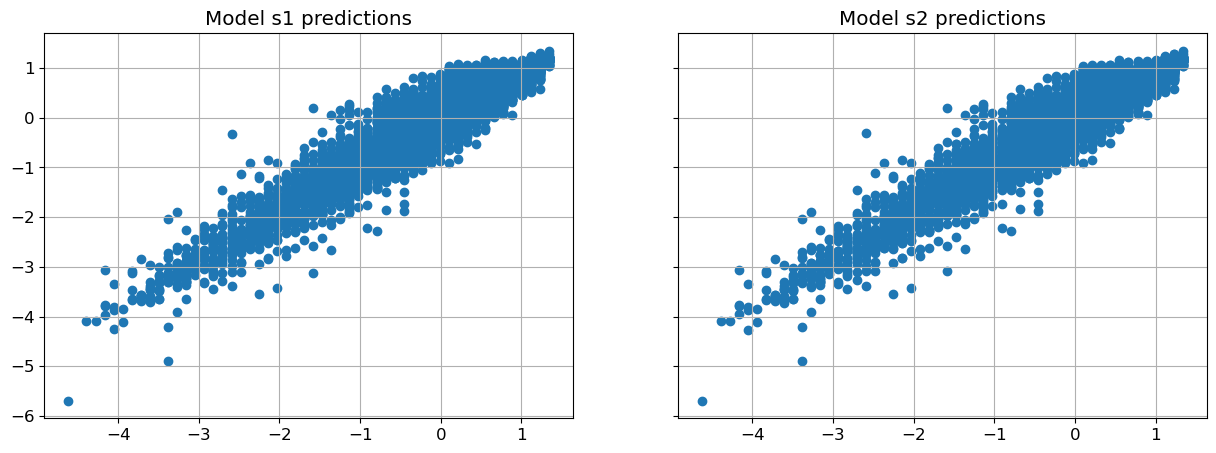

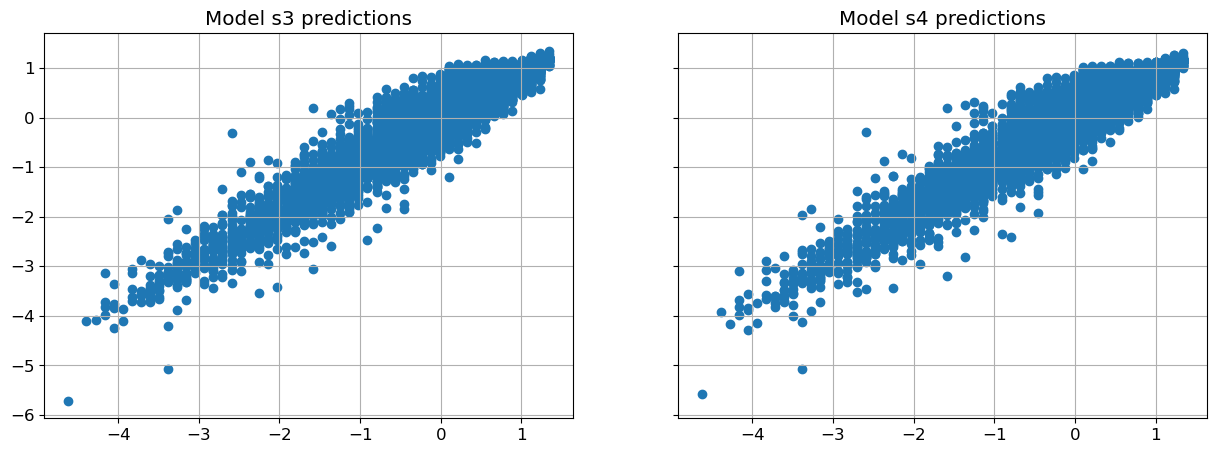

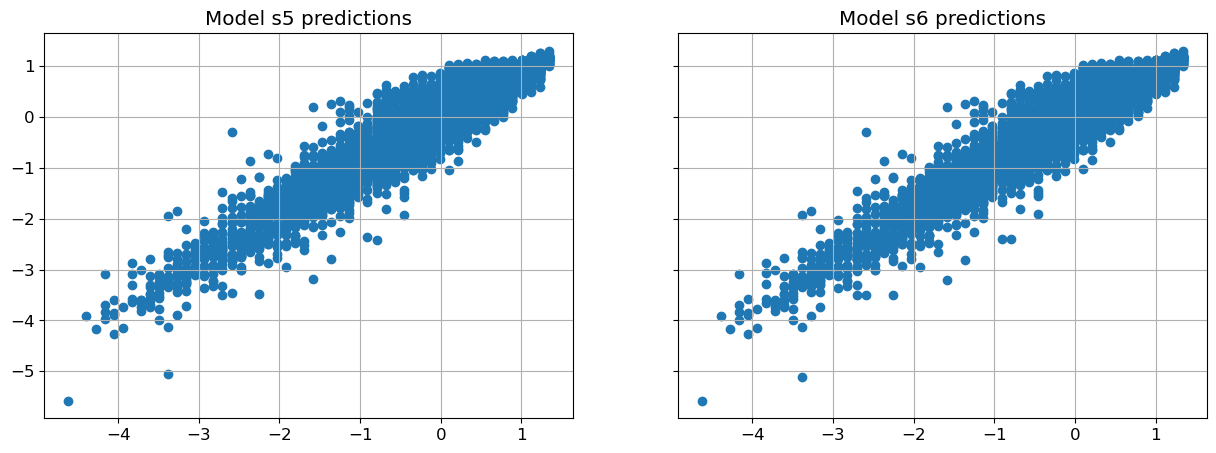

In [166]:
f, (ax1, ax2) =  plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)

ax1.scatter(scale_data['usr'], model_s1_pred)
ax1.set_title('Model s1 predictions')

ax2.scatter(scale_data['usr'],model_s2_pred)
ax2.set_title('Model s2 predictions')

f, (ax1, ax2) =  plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)

ax1.scatter(scale_data['usr'], model_s3_pred)
ax1.set_title('Model s3 predictions')

ax2.scatter(scale_data['usr'],model_s4_pred)
ax2.set_title('Model s4 predictions')


f, (ax1, ax2) =  plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)

ax1.scatter(scale_data['usr'], model_s5_pred)
ax1.set_title('Model s5 predictions')

ax2.scatter(scale_data['usr'],model_s6_pred)
ax2.set_title('Model s6 predictions')

# ax3.scatter(scale_data['usr'], model_s1_pred)
# ax3.set_title('Model s1 predictions')

# ax4.scatter(scale_data['usr'],model_s2_pred)
# ax4.set_title('Model s2 predictions')
plt.show()

### Plot sklearn Linear Regression models

In [167]:
scale_data.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [168]:
from sklearn.linear_model import LinearRegression

In [169]:
lr = LinearRegression()

In [170]:
X = scale_data.drop('usr', axis=1)
Y = scale_data['usr']

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [173]:
# all features
model1 = lr.fit(X_train[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']],Y_train)

In [174]:
#Training Data Prediction
model1_pred_train = model1.predict(X_train[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

In [175]:
#Test Data Prediction
model1_pred_test = model1.predict(X_test[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

In [176]:
# drop 'fork'
model2 = lr.fit(X_train[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']],Y_train)

In [177]:
#Training Data Prediction
model2_pred_train = model2.predict(X_train[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

In [178]:
#Test Data Prediction
model2_pred_test = model2.predict(X_test[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

In [179]:
# drop 'fork','ppgout','pgin','atch'
model3 = lr.fit(X_train[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgfree', 'pgscan', 'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']],Y_train)

In [180]:
#Training Data Prediction
model3_pred_train = model3.predict(X_train[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgfree', 'pgscan', 'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

In [181]:
#Test Data Prediction
model3_pred_test = model3.predict(X_test[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgfree', 'pgscan', 'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

In [182]:
# drop - 'fork','ppgout','pgin','atch','pflt'
model4 = lr.fit(X_train[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgfree', 'pgscan', 'ppgin', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']],Y_train)

In [183]:
#Training Data Prediction
model4_pred_train = model4.predict(X_train[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgfree', 'pgscan', 'ppgin', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

In [184]:
#Test Data Prediction
model4_pred_test = model4.predict(X_test[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgfree', 'pgscan', 'ppgin', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

In [185]:
# drop - 'fork','ppgout','pgin','atch','pflt','pgfree'
model5 = lr.fit(X_train[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgscan', 'ppgin', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']],Y_train)

In [186]:
#Training Data Prediction
model5_pred_train = model4.predict(X_train[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgscan', 'ppgin', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

In [187]:
#Test Data Prediction
model5_pred_test = model5.predict(X_test[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgscan', 'ppgin', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

In [188]:
# drop - 'fork','ppgout','pgin','pflt','pgfree','sread','lwrite'
model6 = lr.fit(X_train[['lread', 'scall', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgscan', 'ppgin', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']],Y_train)

In [189]:
#Training Data Prediction
model6_pred_train = model6.predict(X_train[['lread', 'scall', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgscan', 'ppgin', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

In [190]:
#Test Data Prediction
model6_pred_test = model6.predict(X_test[['lread', 'scall', 'swrite', 'exec', 'rchar',
       'wchar', 'pgout', 'pgscan', 'ppgin', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound']])

In [191]:
# To see the best fit model we can draw a plots on all models

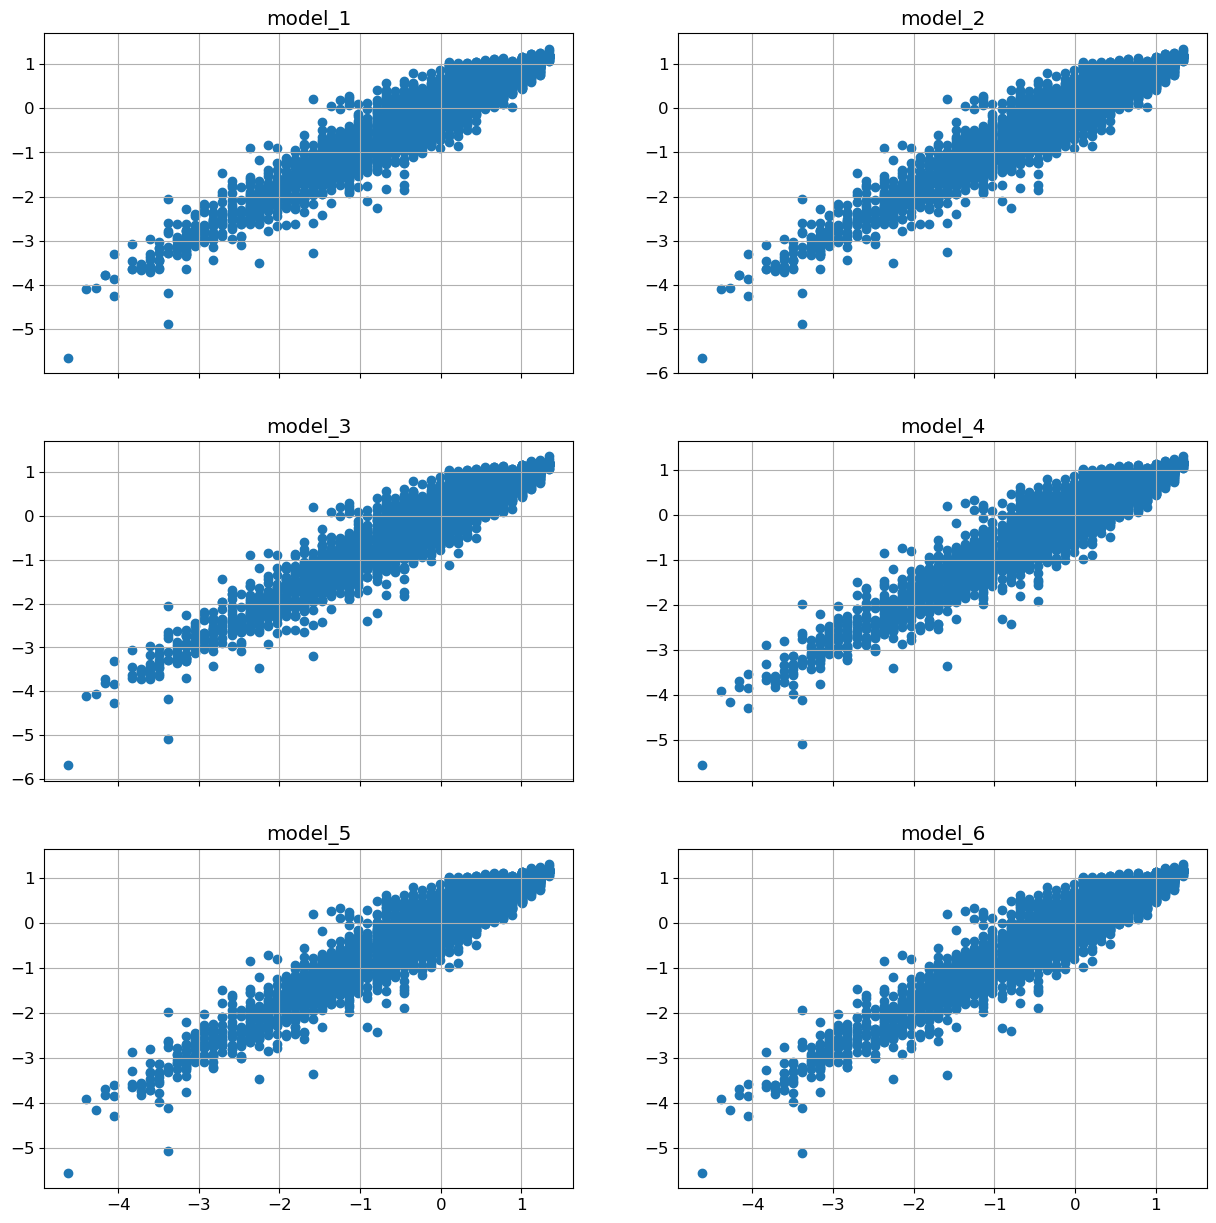

In [192]:
# Training Data
f,a =  plt.subplots(3,2,sharex=True, figsize=(15,15))
a[0][0].scatter(Y_train,model1_pred_train)
a[0][0].set_title('model_1')
a[0][1].scatter(Y_train,model2_pred_train)
a[0][1].set_title('model_2')
a[1][0].scatter(Y_train,model3_pred_train)
a[1][0].set_title('model_3')
a[1][1].scatter(Y_train,model4_pred_train)
a[1][1].set_title('model_4')
a[2][0].scatter(Y_train,model5_pred_train)
a[2][0].set_title('model_5')
a[2][1].scatter(Y_train,model6_pred_train)
a[2][1].set_title('model_6')

plt.show()

Text(0.5, 1.0, 'model_6')

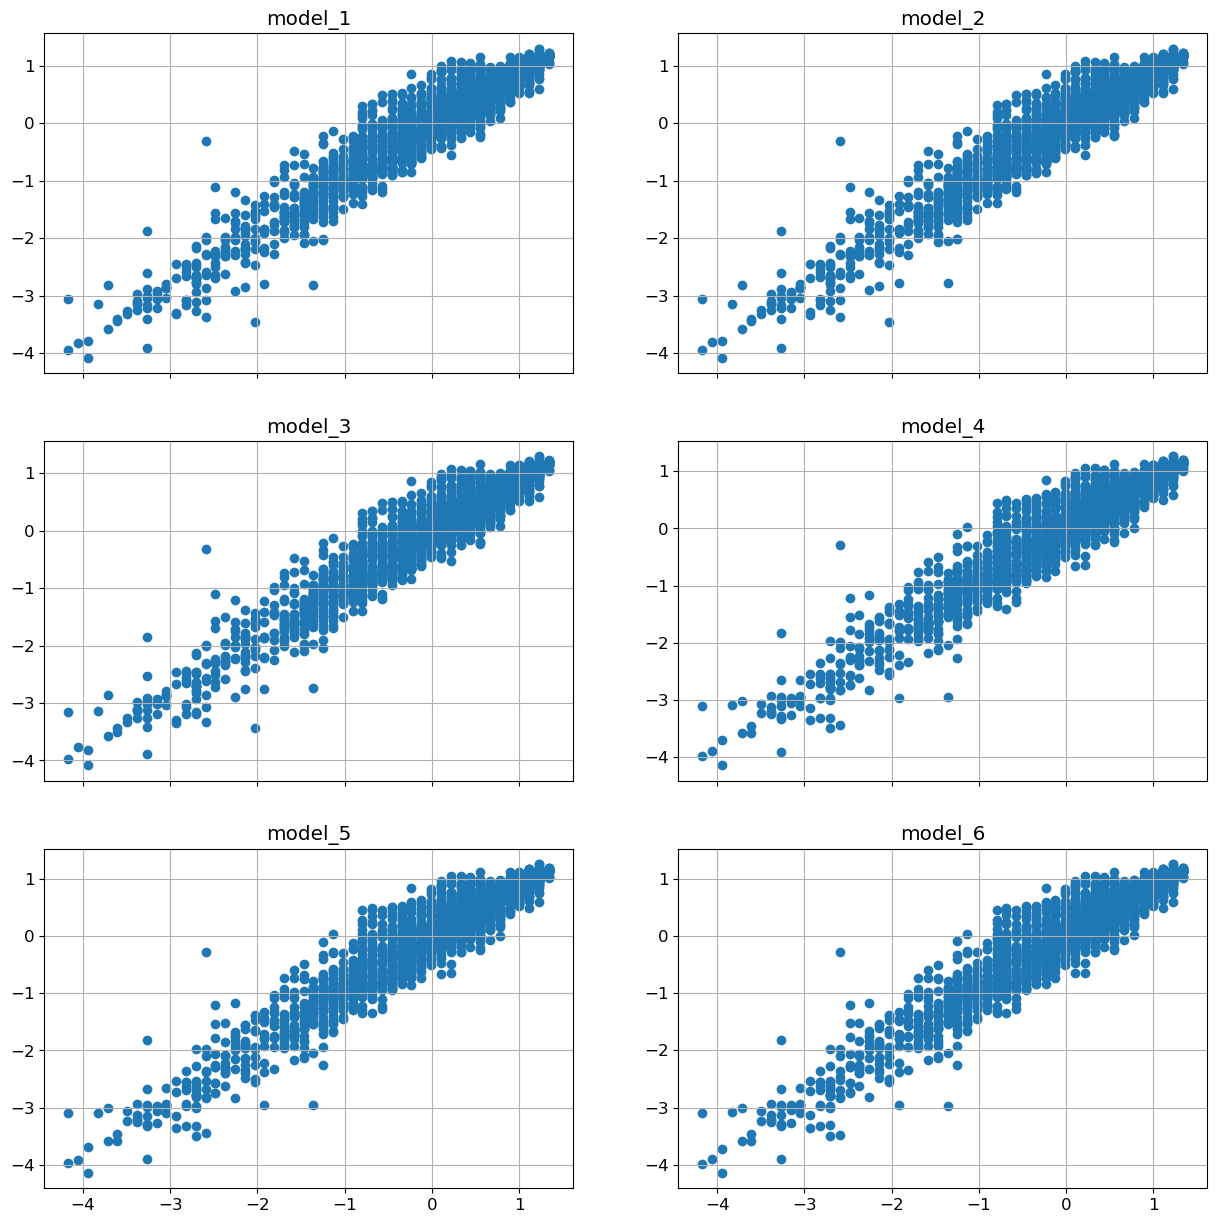

In [193]:
# Test Data
f,a =  plt.subplots(3,2,sharex=True, figsize=(15,15))
a[0][0].scatter(Y_test,model1_pred_test)
a[0][0].set_title('model_1')
a[0][1].scatter(Y_test,model2_pred_test)
a[0][1].set_title('model_2')
a[1][0].scatter(Y_test,model3_pred_test)
a[1][0].set_title('model_3')
a[1][1].scatter(Y_test,model4_pred_test)
a[1][1].set_title('model_4')
a[2][0].scatter(Y_test,model5_pred_test)
a[2][0].set_title('model_5')
a[2][1].scatter(Y_test,model6_pred_test)
a[2][1].set_title('model_6')

#### From the above plots model_6 seems to be best fit on test side because of its better performer on the test side as compared to train side.

In [194]:
from sklearn import metrics

In [195]:
print('RMSE - model_s1',metrics.mean_squared_error(scale_data['usr'], model_s1_pred, squared=False)),'/n'
print('RMSE - model_s2',metrics.mean_squared_error(scale_data['usr'], model_s2_pred, squared=False)),'/n'
print('RMSE - model_s3',metrics.mean_squared_error(scale_data['usr'], model_s3_pred, squared=False)),'/n'
print('RMSE - model_s4',metrics.mean_squared_error(scale_data['usr'], model_s4_pred, squared=False)),'/n'
print('RMSE - model_s5',metrics.mean_squared_error(scale_data['usr'], model_s5_pred, squared=False)),'/n'
print('RMSE - model_s6',metrics.mean_squared_error(scale_data['usr'], model_s6_pred, squared=False))

RMSE - model_s1 0.2921242841532236
RMSE - model_s2 0.29214567390286494
RMSE - model_s3 0.2925994843745787
RMSE - model_s4 0.3008168486710363
RMSE - model_s5 0.3008243895649117
RMSE - model_s6 0.3007958508747594


#### Checking the boxplot and the distplot of the residuals

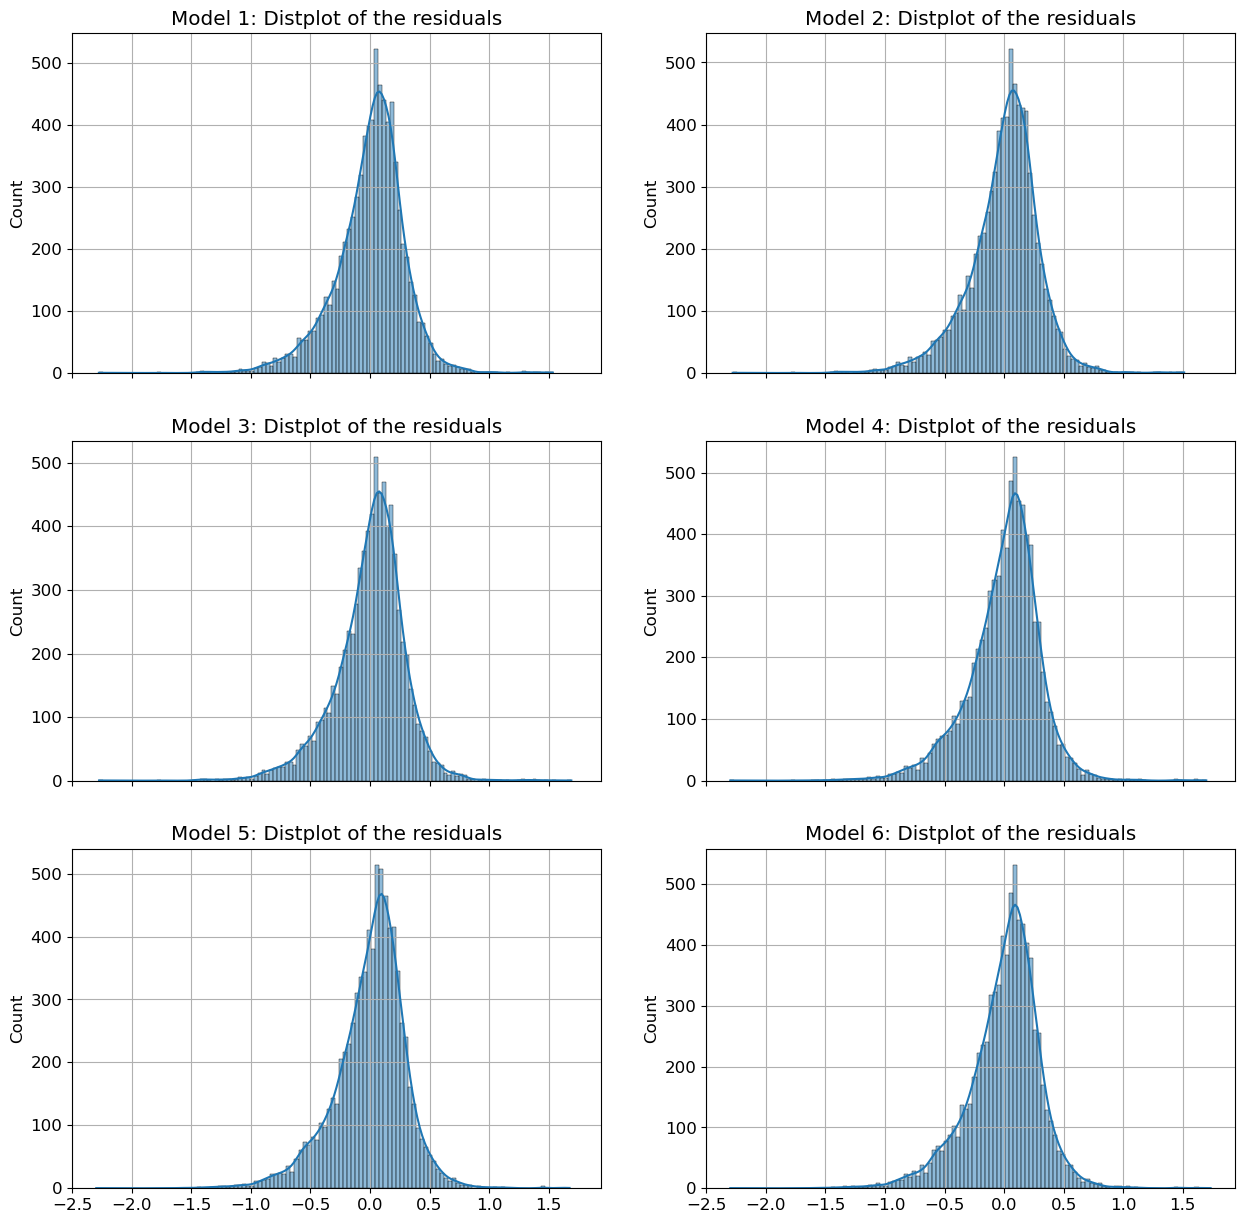

In [196]:
f,a =  plt.subplots(3,2, sharex=True, sharey=False, squeeze=False, figsize=(15,15))

#Plotting the distplot and the boxplot of the residuals for model 8

plot_0 = sns.histplot(model_s1.resid, ax=a[0][0], kde=True)
a[0][0].set_title('Model 1: Distplot of the residuals')

plot_1 = sns.histplot(model_s2.resid, ax=a[0][1], kde=True)
a[0][1].set_title('Model 2: Distplot of the residuals')

plot_3 = sns.histplot(model_s3.resid, ax=a[1][0], kde=True)
a[1][0].set_title('Model 3: Distplot of the residuals')

plot_4 = sns.histplot(model_s4.resid, ax=a[1][1], kde=True)
a[1][1].set_title('Model 4: Distplot of the residuals')

plot_5 = sns.histplot(model_s5.resid, ax=a[2][0], kde=True)
a[2][0].set_title('Model 5: Distplot of the residuals')

plot_6 = sns.histplot(model_s6.resid, ax=a[2][1], kde=True)
a[2][1].set_title('Model 6: Distplot of the residuals')
plt.show()


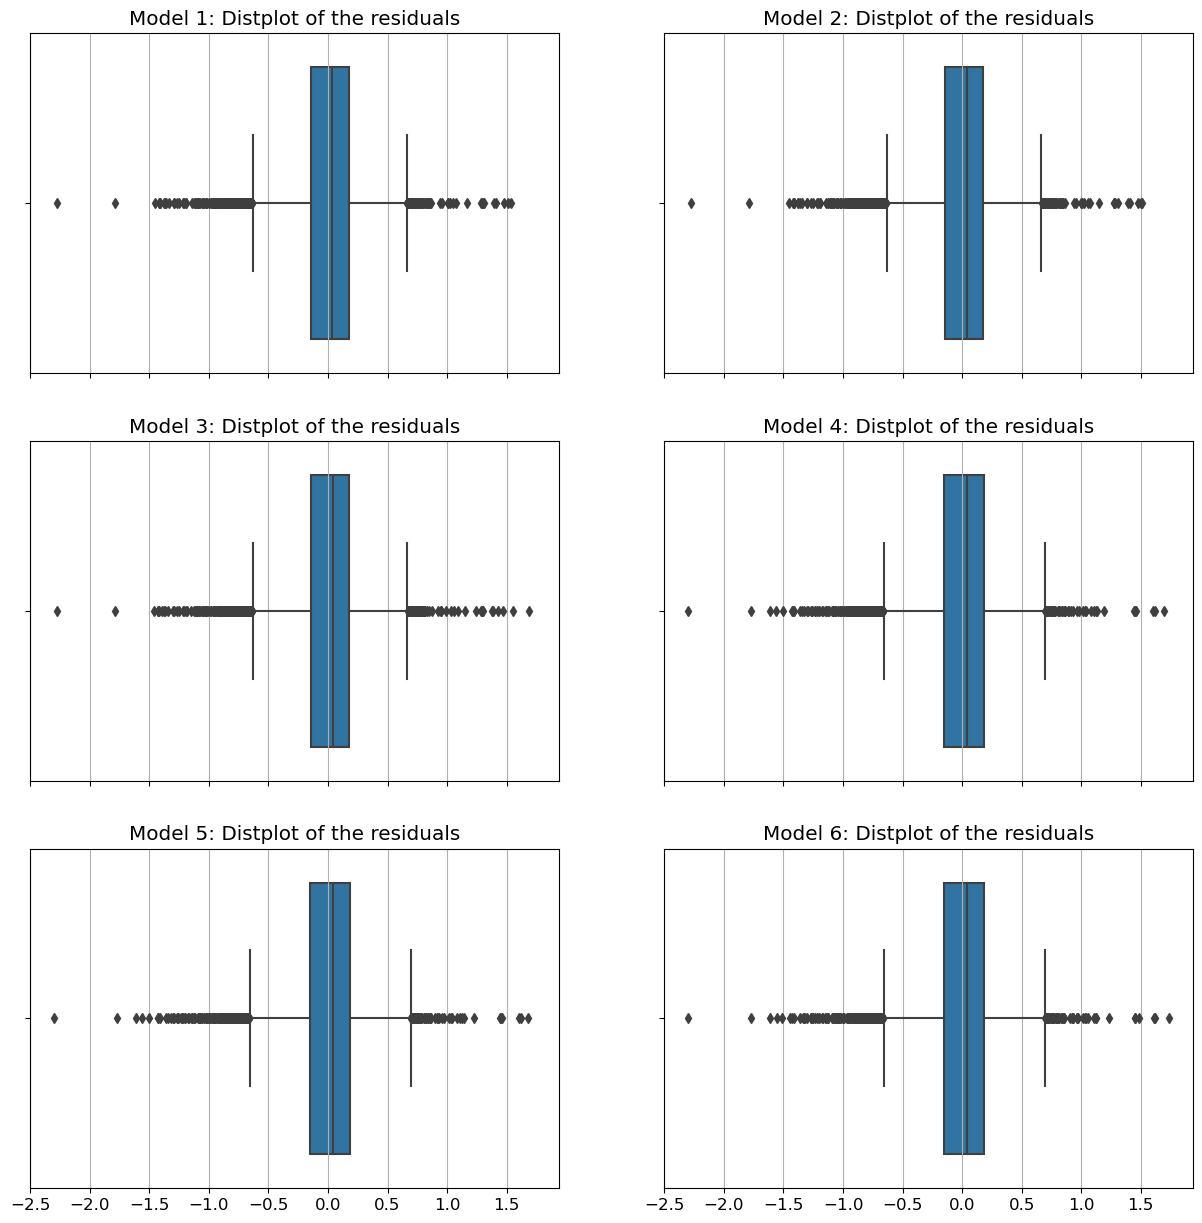

In [197]:
f,a =  plt.subplots(3,2, sharex=True, sharey=False, squeeze=False, figsize=(15,15))

#Plotting the distplot and the boxplot of the residuals for model 8

plot_0 = sns.boxplot(x=model_s1.resid, ax=a[0][0])
a[0][0].set_title('Model 1: Distplot of the residuals')

plot_1 = sns.boxplot(x=model_s2.resid, ax=a[0][1])
a[0][1].set_title('Model 2: Distplot of the residuals')

plot_3 = sns.boxplot(x=model_s3.resid, ax=a[1][0])
a[1][0].set_title('Model 3: Distplot of the residuals')

plot_4 = sns.boxplot(x=model_s4.resid, ax=a[1][1])
a[1][1].set_title('Model 4: Distplot of the residuals')

plot_5 = sns.boxplot(x=model_s5.resid, ax=a[2][0])
a[2][0].set_title('Model 5: Distplot of the residuals')

plot_6 = sns.boxplot(x=model_s6.resid, ax=a[2][1])
a[2][1].set_title('Model 6: Distplot of the residuals')
plt.show()

## RMSE check for all the models built

In [198]:
print('Training Data RMSE of model_2:',metrics.mean_squared_error(Y_train,model2_pred_train,squared=False))
print('Test Data RMSE of model_2:',metrics.mean_squared_error(Y_test,model2_pred_test,squared=False))

Training Data RMSE of model_2: 0.2905371484847331
Test Data RMSE of model_2: 0.29650655686381816


In [199]:
print('Training Data RMSE of model_3:',metrics.mean_squared_error(Y_train,model3_pred_train,squared=False))
print('Test Data RMSE of model_3:',metrics.mean_squared_error(Y_test,model3_pred_test,squared=False))

Training Data RMSE of model_3: 0.2912979907700653
Test Data RMSE of model_3: 0.29615720537543916


In [200]:
print('Training Data RMSE of model_4:',metrics.mean_squared_error(Y_train,model4_pred_train,squared=False))
print('Test Data RMSE of model_4:',metrics.mean_squared_error(Y_test,model4_pred_test,squared=False))

Training Data RMSE of model_4: 0.29960015918031996
Test Data RMSE of model_4: 0.3040888317889777


In [201]:
print('Training Data RMSE of model_5:',metrics.mean_squared_error(Y_train,model5_pred_train,squared=False))
print('Test Data RMSE of model_5:',metrics.mean_squared_error(Y_test,model5_pred_test,squared=False))

Training Data RMSE of model_5: 0.2996229781215472
Test Data RMSE of model_5: 0.30404621130772025


In [202]:
print('Training Data RMSE of model_6:',metrics.mean_squared_error(Y_train,model6_pred_train,squared=False))
print('Test Data RMSE of model_6:',metrics.mean_squared_error(Y_test,model6_pred_test,squared=False))

Training Data RMSE of model_6: 0.2997112100872724
Test Data RMSE of model_6: 0.30399925827823376


#### The model which is having the lowest Test Data RMSE value is the best model acconding to Linear Regression. In this case model_3 is possessing the lowest RMSE value that is 0.2961.....
#### But model_3 consists of lots of multicolinearity hence, model_6 can be recommended as best model with reduced features.

---

### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
#### Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

### Solution: - 

- ### Data Description
- #### This dataset is mainly based on Memory management system and Degree of Multiprogramming in CPU.
- #### CPU performs its operations mainly in User mode and Kernal mode.
- #### Business problem is to build a model to compute the performance of CPU in User mode.
- #### Build the best performing model with the features which have impact on CPU performance, utilization and portion of time.
- #### Primary memory operations have major impact on portion of time that CPU run in user mode.
- #### Multiprogramming means to bring more and more processes into the Primary memory from secondary memory. The whole process may bring into primary memory or the process may be divided into fractions or blocks and bring them in part by part/blocks through paging and segmentations in order to keep maximum number of processes in ready state and increase the efficiency of the CPU.
- #### Out of which we need to predict and build the model on the Portion of time(%) that cpus run in user mode ('usr') - As Target Variable

### Steps performed
##### 1. Read the dataset with Python Libraries
##### 2. Checking of null and imputed them with median values. As data points in all features are not normally distributed
##### 3. Checked the duplicate values and there are no duplicate values
##### 4. All features are numerical features and the only feature 'runsqz' is categorical.
##### 5. The target feature 'usr' is numerical, hence model can be built with the Linear Regression.
##### 6. EDA process of the data like checking of outliers in the data set.
##### 7. Target feature has extreme outliers and are drop to improve the performance and build effective model.
##### 8. First check the multicolinearity among the independent variables with the help of VIF(Variance Inflation Factor'), drop the feature which have highest VIF value and VIF value which have more than 5.
##### 9. Drop the features which have P value more than 0.05 which means the feature which are not significant to build the model.
##### 10. Finally 6 diffirent models were built and the model which performs best on test side like highest performance value and lowest RMSE value will be considered from the business perspective.
##### 11. All models will be submitted to the client and client will take decision for adopting of the model which best suites for his business out of the six models built.
##### 12. According to the thumb rule model 6 is better performer on test side, relatively pocess a decent RMSE value and have a very limited number of features which are directly affects in performance of the model. 

---

Problem 2: Logistic Regression, LDA and CART

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

Dataset for Problem 2: Contraceptive_method_dataset.xlsx

### Data Dictionary:

#### 1. Wife's age (numerical)
#### 2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
#### 3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
#### 4. Number of children ever born (numerical)
#### 5. Wife's religion (binary) Non-Scientology, Scientology
#### 6. Wife's now working? (binary) Yes, No
#### 7. Husband's occupation (categorical) 1, 2, 3, 4(random)
#### 8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
#### 9. Media exposure (binary) Good, Not good
#### 10. Contraceptive method used (class attribute) No,Yes

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

---

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

---

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

---

### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

---

### End

---